#**Proyecto - Determinación de la Esperanza de Vida**

## 1. Definición del Objetivo

¿Es posible identificar los aspectos claves que generan una mayor esperanza de vida?

El objetivo de este proyecto será poder ser capaz de estimar la esperanza de vida de una región a través de los valores de algunos indicadores claves.

Vamos a trabajar con datos del Banco Mundial (https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators) del período 1960-2022.

## 2. Contexto Institucional

En la actualidad es necesario mejorar la calidad de vida da la población. Con ese objetivo, vamos a analizar la información disponible para poder identificar los factores que tengan mayor incidencia en el valor de la esperanza de vida, permitiéndonos dirigir y diseñar políticas sociales y económicas destinadas a mejorar la situación de las poblaciones estudiadas.

##3. Problema Institucional

¿Cuáles son los indicadores cuya variación afecta el resultado de la esperanza de vida en una región?

## 4. Contexto Analítico

Utilizaremos la información disponible del Banco Mundial para el período 1960 a 2022, como se menciona en puntos anteriores.

El dataset contiene de más de 100 indicadores para más de 200 países durante un período de más de 50 años.

## 5. Exploratory Data Analysis (EDA)

### 5.1. Data Acquisition

In [ ]:
#Importamos las librerías a utilizar durante  el proyecto
import pandas as pd
import numpy as np

#Desactivamos todos los warnings de Pandas
import warnings
warnings.filterwarnings('ignore')

#Cargamos el archivo Indicators, generando un dataframe
import os

df = pd.read_csv('WDICSV.csv', sep=",")

El tamaño del dataframe utilizado es el siguiente:

In [2]:
filas,columnas =df.shape
print(f'El dataframe inicial tiene {filas} filas y {columnas} columnas.')

El dataframe inicial tiene 392882 filas y 67 columnas.


Los encabezados de cada dataframe son los siguientes:

In [3]:
#Encabezados de la tabla
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.672306,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN


Vamos a ver las columnas que componen la base de datos:

In [4]:
lista_columnas = list(df.columns.values)

print(lista_columnas)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


####5.1.1. Variables del dataset

Vamos a detallar algunas de las variables de este dataset que se van a utilizar en el modelo:

* **AG.LND.AGRI.ZS - Territorio agrícola (% territorio)**

> Porcentaje de tierra agrícola sobre el total del territorio. Se denomina tierra agrícola a la porción del área de tierra cultivable, afectada a cultivo permanente y a pradera permanente. La tierra cultivable incluye aquellos terrenos definidos por la FAO como afectados a cultivos temporales (las zonas de doble cosecha se cuentan una sola vez), los prados temporales para segar o para pasto, las tierras cultivadas como huertos comerciales o domésticos, y las tierras temporalmente en barbecho. Se excluyen las tierras abandonadas a causa del cultivo migratorio. La tierra destinada a cultivos permanentes es aquella en que se siembran cultivos que ocupan la tierra durante períodos prolongados y que no necesitan replantarse tras cada cosecha, como el cacao, el café y el caucho. En esta categoría se incluyen los terrenos con arbustos de flores, árboles frutales, árboles de frutos secos y vides, pero se excluyen aquellos donde se siembran árboles para obtener madera o madera de construcción. Las praderas permanentes son los terrenos que se explotan durante cinco o más años para forraje, ya se trate de especies naturales o cultivadas.


* **EG.ELC.ACCS.ZS - Acceso a la electricidad (% de la población)**

> Es el porcentaje de la población con acceso a la electricidad.

* **EN.POP.DNST - Densidad de población (personas por km2)**

> Es la población a mitad de año dividida por la superficie territorial en kilómetros cuadrados.

* **IT.NET.USER.ZS - Usuarios de internet (% de la población)**

> Porcentaje de la población que utiliza Internet. Los usuarios de Internet son personas que han utilizado Internet (desde cualquier lugar) en los últimos 3 meses.

* **NY.GDP.PCAP.CD - PBI per capita (USD)**

> El PIB per cápita es el producto interno bruto dividido por la población a mitad de año. El PIB es la suma del valor agregado bruto de todos los productores residentes en la economía más todo impuesto a los productos, menos todo subsidio no incluido en el valor de los productos. Se calcula sin hacer deducciones por depreciación de bienes manufacturados o por agotamiento y degradación de recursos naturales. Datos en US$ a precios actuales.

* **SH.DYN.MORT - Tasa de mortalidad infantil (cada 1.000 vivos)**

> La tasa de mortalidad infantil es la probabilidad por cada 1.000 que un recién nacido muera antes de cumplir cinco años de edad, si está sujeto a las tasas de mortalidad específicas por edad del año especificado.

* **SH.H2O.BASW.ZS - Acceso al agua potable (% de la población)**

> El porcentaje de personas que utilizan al menos servicios básicos de agua. Este indicador abarca tanto a las personas que utilizan servicios básicos de agua como a aquellas que utilizan servicios de agua gestionados de forma segura. Los servicios básicos de agua potable se definen como agua potable de fuente mejorada, siempre que el tiempo de recolección no supere los 30 minutos para un viaje de ida y vuelta. Las fuentes de agua mejoradas incluyen agua entubada, perforaciones o pozos entubados, pozos excavados protegidos, manantiales protegidos y agua envasada o entregada.

* **SH.IMM.IDPT: Vacunación DPT (% chicos entre 1 y 2 años)**

> La inmunización de niños mide el porcentaje de niños de entre 12 y 23 meses de edad que recibieron vacunas antes de los 12 meses o en cualquier momento antes de la encuesta. Se considera que un niño está inmunizado de manera adecuada contra la difteria, la pertussis (tos ferina) y el tétanos (DPT) tras recibir tres dosis de la vacuna.

* **SH.IMM.MEAS: Vacunación Sarampión (% chicos entre 1 y 2 años)**

> La inmunización de niños mide el porcentaje de niños de entre 12 y 23 meses de edad que recibieron vacunas antes de los 12 meses o en cualquier momento antes de la encuesta. Se considera que un niño está inmunizado de manera adecuada contra el sarampión tras recibir una dosis de la vacuna.

* **SH.STA.BASS.ZS - Acceso a servicios sanitarios básicos (% de la población)**

> El porcentaje de personas que utilizan al menos servicios básicos de saneamiento, es decir, instalaciones sanitarias mejoradas que no se comparten con otros hogares. Este indicador abarca tanto a las personas que utilizan servicios de saneamiento básicos como a aquellas que utilizan servicios de saneamiento gestionados de forma segura. Las instalaciones de saneamiento mejoradas incluyen sistemas de descarga/vertido de agua a sistemas de alcantarillado, fosas sépticas o letrinas de pozo; letrinas de pozo mejoradas y ventiladas, sanitarios compuestos o letrinas de pozo con losas.

* **SL.UEM.TOTL.ZS - Desempleo (% población en edad de trabajo)**

> El desempleo es la proporción de la población activa que no tiene trabajo pero que busca trabajo y está disponible para realizarlo. Las definiciones de población activa y desempleo difieren según el país.

* **SP.DYN.CBRT.IN - Tasa de nacimiento (cada 1.000 personas)**

> La tasa bruta de natalidad indica la cantidad de nacidos vivos en el año, por cada 1000 habitantes, estimada a mitad de año. Si se resta la tasa bruta de mortalidad a la tasa bruta de natalidad ofrece la tasa de incremento natural, que es igual a la tasa de crecimiento de la población en ausencia de migración.

* **SP.DYN.LE00.IN - Esperanza de vida (años)**

> La esperanza de vida al nacer indica la cantidad de años que viviría un recién nacido si los patrones de mortalidad vigentes al momento de su nacimiento no cambian a lo largo de la vida del infante.

* **SP.POP.TOTL - Población (personas)**

> La población total se basa en la definición de población de facto, que cuenta a todos los residentes independientemente de su estatus legal o ciudadanía. Los valores que se muestran son estimaciones de mitad de año.

* **SP.URB.TOTL.IN.ZS: Población urbana (% del total)**

> La población urbana se refiere a las personas que viven en áreas urbanas según lo definen las oficinas nacionales de estadística.

* **TG.VAL.TOTL.GD.ZS: Comercio (% PBI)**

> El comercio de mercaderías como proporción del PIB es la suma de las exportaciones e importaciones de mercaderías dividida por el valor del PIB, todo en dólares de los Estados Unidos, a precios corrientes.

### 5.2. Data Wrangling

#### 5.2.1. Selección de Datos

Vamos a trabajar con los datos del año 2000 en adelante.

In [5]:
#Elegimos el año de inicio
start_year = '2000'

start_year_column = df.columns.get_loc(start_year)

#Seleccionamos las columnas a copiar y creamos un nuevo dataframe
selected_columns = [0, 1, 2, 3] + list(range(start_year_column, len(df.columns)))
df2000 = df.iloc[:, selected_columns].copy()

df2000

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,11.580366,11.907943,12.285175,12.607641,12.990589,13.394404,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,3.546244,3.713752,3.904902,4.093657,4.312080,4.530435,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,32.604500,32.964159,33.409617,33.791497,34.220485,34.727444,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,19.957302,19.975365,21.576500,22.529265,23.749531,23.493013,...,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,8.623497,NaN,NaN,9.765491,10.910243,10.442796,...,18.672306,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392877,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392878,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN,NaN
392879,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN,NaN
392880,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,56.300000,56.600000,56.800000,57.000000,57.200000,57.400000,...,59.100000,59.400000,59.500000,59.700000,59.900000,60.100000,60.300000,60.500000,60.700000,NaN


#### 5.2.2. Agrupamiento de Datos

Primero vamos a crear una fila para cada indicador.

In [6]:
melted_df = pd.melt(df2000, id_vars=['Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Value')

melted_df.shape

(9429168, 5)

Vamos a agrupar los datos por año.

In [7]:
#Usamos la función pivot para crear df2.
df2 = melted_df.pivot(index=['Country Code', 'Year'], columns='Indicator Code', values='Value')

#Reiniciamos los nombres de las columnas.
df2.reset_index(inplace=True)

df2.shape

(6384, 1479)

In [8]:
df2

Indicator Code,Country Code,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,ABW,2000,NaN,NaN,NaN,20.0,11.111111,2000.0,0.022446,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,2001,NaN,NaN,NaN,20.0,11.111111,2000.0,0.022053,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,2002,NaN,NaN,NaN,20.0,11.111111,2000.0,0.021791,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,2003,NaN,NaN,NaN,20.0,11.111111,2000.0,0.021575,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,2004,NaN,NaN,NaN,20.0,11.111111,2000.0,0.021381,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,ZWE,2019,NaN,623.474178,33.2,162000.0,41.876696,4000000.0,0.260508,10.339925,...,18.893733,14.565084,15.862261,5.703138,4.807448,1.800944,5.747923,2.041201,4.674356,9.559706
6380,ZWE,2020,NaN,212.474438,25.975,162000.0,41.876696,4000000.0,0.25527,10.339925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6381,ZWE,2021,NaN,212.474438,25.975,162000.0,41.876696,4000000.0,0.250101,10.339925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6382,ZWE,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a revisar de qué tipo de datos es cada columna

In [9]:
df2.dtypes

Indicator Code
Country Code               object
Year                       object
AG.AGR.TRAC.NO             object
AG.CON.FERT.PT.ZS          object
AG.CON.FERT.ZS             object
                            ...  
per_si_allsi.cov_q1_tot    object
per_si_allsi.cov_q2_tot    object
per_si_allsi.cov_q3_tot    object
per_si_allsi.cov_q4_tot    object
per_si_allsi.cov_q5_tot    object
Length: 1479, dtype: object

Vamos a convertir la columna 'Year' a número

In [10]:
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce').astype('Int64')

df2.dtypes

Indicator Code
Country Code               object
Year                        Int64
AG.AGR.TRAC.NO             object
AG.CON.FERT.PT.ZS          object
AG.CON.FERT.ZS             object
                            ...  
per_si_allsi.cov_q1_tot    object
per_si_allsi.cov_q2_tot    object
per_si_allsi.cov_q3_tot    object
per_si_allsi.cov_q4_tot    object
per_si_allsi.cov_q5_tot    object
Length: 1479, dtype: object

#### 5.2.3. Identificación de Países

Vamos completar la información de los países para poder incluirla dentro de nuestro análisis.

In [11]:
##Vamos a cargar un archivo csv con información de los países (nombre y región)
dp = pd.read_csv('Country.csv', sep=",")

dp

,CountryCode,CountryName,Region
0,AFG,Afghanistan,Asia
1,ALB,Albania,Europa
2,ARE,Emir. Árabes Unidos,Asia
3,ARG,Argentina,América del Sur
4,ARM,Armenia,Asia
...,...,...,...
154,WSM,Samoa,Oceania
155,YEM,Yemen,Asia
156,ZAF,Sudáfrica,Africa
157,ZAR,Rep. Dem. Del Congo,Africa


In [12]:
#Renombramos la columna 'Country Code'
df2.rename(columns={'Country Code': 'CountryCode'}, inplace=True)

#Vamos a agregar la columna "Región" al dataframe.
df3 = df2.merge(dp[['CountryCode', 'Region']], on='CountryCode', how='left')

df3

,CountryCode,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot,Region
0,ABW,2000,NaN,NaN,NaN,20.0,11.111111,2000.0,0.022446,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,2001,NaN,NaN,NaN,20.0,11.111111,2000.0,0.022053,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,2002,NaN,NaN,NaN,20.0,11.111111,2000.0,0.021791,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,2003,NaN,NaN,NaN,20.0,11.111111,2000.0,0.021575,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,2004,NaN,NaN,NaN,20.0,11.111111,2000.0,0.021381,11.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,ZWE,2019,NaN,623.474178,33.2,162000.0,41.876696,4000000.0,0.260508,10.339925,...,14.565084,15.862261,5.703138,4.807448,1.800944,5.747923,2.041201,4.674356,9.559706,NaN
6380,ZWE,2020,NaN,212.474438,25.975,162000.0,41.876696,4000000.0,0.25527,10.339925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6381,ZWE,2021,NaN,212.474438,25.975,162000.0,41.876696,4000000.0,0.250101,10.339925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6382,ZWE,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En el listado hay instancias que corresponden a regiones o grupos de países con características similares. Vamos a eliminar esos archivos para que no afecten los resultados.

In [13]:
#Y eliminamos esas filas

dfpaises = df3.dropna(subset=['Region'])

dfpaises.shape

(3768, 1480)

#### 5.2.4. Tratamiento de Datos Nulos

La vista de los encabezados muestra que vamos a tener que realizar un análisis de los datos nulos. Primero vamos a eliminar las filas cuyo valor de PBI es nulo.

In [14]:
nulos_year = dfpaises['Year'].isnull().sum()
nulos_espvida = dfpaises['SP.DYN.LE00.IN'].isnull().sum()

print(f'Cant. nulos columna Años: {nulos_year}')
print(f'Cant. nulos columna Esperanza de vida: {nulos_espvida}')

Cant. nulos columna Años: 157
Cant. nulos columna Esperanza de vida: 157


In [15]:
#Eliminamos las filas sin valores de Año o PBI
dfpaises2 = dfpaises.dropna(subset=['Year','SP.DYN.LE00.IN'])

#Repetimos el código para comprobar
nulos_year = dfpaises2['Year'].isnull().sum()
nulos_espvida = dfpaises2['SP.DYN.LE00.IN'].isnull().sum()

print(f'Cant. nulos columna Años: {nulos_year}')
print(f'Cant. nulos columna Esperanza de vida: {nulos_espvida}')

Cant. nulos columna Años: 0
Cant. nulos columna Esperanza de vida: 0


Vamos a ver la cantidad de nulos por columna.

In [16]:
nulos_por_columna = dfpaises2.isnull().sum()

print(nulos_por_columna)

CountryCode                   0
Year                          0
AG.AGR.TRAC.NO             2778
AG.CON.FERT.PT.ZS          1827
AG.CON.FERT.ZS              107
                           ... 
per_si_allsi.cov_q2_tot    3069
per_si_allsi.cov_q3_tot    3069
per_si_allsi.cov_q4_tot    3069
per_si_allsi.cov_q5_tot    3069
Region                        0
Length: 1480, dtype: int64


Las columnas que comienzan con "per..." son datos fallidos. Se eliminarán.

In [17]:
columnas_a_eliminar = [col for col in dfpaises.columns if col.startswith('per')]
dfpaises3 = dfpaises2.drop(columnas_a_eliminar, axis=1)

columnas_indic = list(dfpaises3.columns.values)

print(columnas_indic)

['CountryCode', 'Year', 'AG.AGR.TRAC.NO', 'AG.CON.FERT.PT.ZS', 'AG.CON.FERT.ZS', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS', 'AG.LND.ARBL.HA', 'AG.LND.ARBL.HA.PC', 'AG.LND.ARBL.ZS', 'AG.LND.CREL.HA', 'AG.LND.CROP.ZS', 'AG.LND.EL5M.RU.K2', 'AG.LND.EL5M.RU.ZS', 'AG.LND.EL5M.UR.K2', 'AG.LND.EL5M.UR.ZS', 'AG.LND.EL5M.ZS', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.LND.PRCP.MM', 'AG.LND.TOTL.K2', 'AG.LND.TOTL.RU.K2', 'AG.LND.TOTL.UR.K2', 'AG.LND.TRAC.ZS', 'AG.PRD.CREL.MT', 'AG.PRD.CROP.XD', 'AG.PRD.FOOD.XD', 'AG.PRD.LVSK.XD', 'AG.SRF.TOTL.K2', 'AG.YLD.CREL.KG', 'BG.GSR.NFSV.GD.ZS', 'BM.GSR.CMCP.ZS', 'BM.GSR.FCTY.CD', 'BM.GSR.GNFS.CD', 'BM.GSR.INSF.ZS', 'BM.GSR.MRCH.CD', 'BM.GSR.NFSV.CD', 'BM.GSR.ROYL.CD', 'BM.GSR.TOTL.CD', 'BM.GSR.TRAN.ZS', 'BM.GSR.TRVL.ZS', 'BM.KLT.DINV.CD.WD', 'BM.KLT.DINV.WD.GD.ZS', 'BM.TRF.PRVT.CD', 'BM.TRF.PWKR.CD.DT', 'BN.CAB.XOKA.CD', 'BN.CAB.XOKA.GD.ZS', 'BN.FIN.TOTL.CD', 'BN.GSR.FCTY.CD', 'BN.GSR.GNFS.CD', 'BN.GSR.MRCH.CD', 'BN.KAC.EOMS.CD', 'BN.KLT.DINV.

In [18]:
dfpaises3.shape

(3454, 1453)

Vamos a eliminar las columnas que tengan más de 20% de valores nulos (350 aprox).

In [19]:
#Definimos el umbral de corte
filas,columnas = dfpaises3.shape
porc_umbral = 0.2 #Equivale al 20%

umbral = round(filas * porc_umbral,0)

#Borramos las columnas con exceso de datos nulos.
nulos_por_columna = dfpaises3.isnull().sum()
columnas_a_eliminar = nulos_por_columna[nulos_por_columna > umbral].index

columnas_a_eliminar

dfcleaned = dfpaises3.drop(columnas_a_eliminar, axis=1)

dfcleaned

,CountryCode,Year,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,VA.EST,VA.NO.SRC,VA.PER.RNK,VA.PER.RNK.LOWER,VA.PER.RNK.UPPER,VA.STD.ERR,Region
48,AFG,2000,0.650787,377940.0,57.945817,7683000.0,0.393133,11.779587,2406000.0,0.170185,...,NaN,NaN,NaN,-2.031417,4.0,0.995025,0.0,5.472637,0.254043,Asia
49,AFG,2001,2.394898,377950.0,57.94735,7683000.0,0.390225,11.779587,2094000.0,0.171719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
50,AFG,2002,3.19439,377900.0,57.939684,7678000.0,0.365615,11.771921,2238000.0,0.171719,...,NaN,NaN,NaN,-1.433421,6.0,9.452736,2.985075,14.925373,0.189453,Asia
51,AFG,2003,3.478546,378840.0,58.083805,7772000.0,0.343208,11.916042,3004700.0,0.171719,...,NaN,NaN,NaN,-1.177571,5.0,14.42786,6.965174,24.378109,0.207045,Asia
52,AFG,2004,4.243778,379280.0,58.151266,7816000.0,0.33184,11.983503,2667000.0,0.171719,...,NaN,NaN,NaN,-1.203034,7.0,15.384615,7.211538,21.634615,0.17559,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,ZMB,2017,72.052916,238390.0,32.067959,3800000.0,0.219678,5.111718,1564347.0,0.052462,...,864940286.949804,5.64217,75.444767,-0.335554,14.0,36.453201,32.019703,41.871922,0.122421,Africa
6354,ZMB,2018,52.513334,238390.0,32.067959,3800000.0,0.213054,5.111718,1200537.0,0.052462,...,953204795.028419,5.641553,77.862845,-0.336164,14.0,35.436893,30.582523,39.805824,0.126686,Africa
6355,ZMB,2019,67.5756,238390.0,32.067959,3800000.0,0.206741,5.111718,927238.0,0.052462,...,1011822349.75931,4.206893,80.965044,-0.30962,13.0,35.748791,31.884058,41.062801,0.120453,Africa
6356,ZMB,2020,79.764039,238390.0,32.067959,3800000.0,0.200764,5.111718,1486760.0,0.052462,...,555624813.639169,8.308675,74.070918,-0.428919,13.0,34.782608,29.951691,37.68116,0.12023,Africa


Vamos a ver la distribución de los datos nulos.

In [20]:
nulos_por_columna = dfcleaned.isnull().sum()

columnas_con_nulos_ordenadas = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)
print(columnas_con_nulos_ordenadas)

ST.INT.RCPT.CD       691
NE.DAB.TOTL.KD       682
NE.GDI.TOTL.KD       682
NE.GDI.TOTL.KD.ZG    680
BN.TRF.KOGT.CD       670
                    ... 
SL.EMP.WORK.MA.ZS      1
SL.EMP.WORK.FE.ZS      1
SL.UEM.TOTL.FE.ZS      1
SL.EMP.VULN.MA.ZS      1
SL.UEM.TOTL.ZS         1
Length: 506, dtype: int64


Quedaron las siguientes columnas

In [21]:
cleaned_columnas = list(dfcleaned.columns.values)

print(cleaned_columnas)

['CountryCode', 'Year', 'AG.CON.FERT.ZS', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS', 'AG.LND.ARBL.HA', 'AG.LND.ARBL.HA.PC', 'AG.LND.ARBL.ZS', 'AG.LND.CREL.HA', 'AG.LND.CROP.ZS', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS', 'AG.LND.PRCP.MM', 'AG.LND.TOTL.K2', 'AG.PRD.CREL.MT', 'AG.PRD.CROP.XD', 'AG.PRD.FOOD.XD', 'AG.PRD.LVSK.XD', 'AG.SRF.TOTL.K2', 'AG.YLD.CREL.KG', 'BG.GSR.NFSV.GD.ZS', 'BM.GSR.CMCP.ZS', 'BM.GSR.FCTY.CD', 'BM.GSR.GNFS.CD', 'BM.GSR.INSF.ZS', 'BM.GSR.MRCH.CD', 'BM.GSR.NFSV.CD', 'BM.GSR.TOTL.CD', 'BM.GSR.TRAN.ZS', 'BM.GSR.TRVL.ZS', 'BM.KLT.DINV.CD.WD', 'BM.KLT.DINV.WD.GD.ZS', 'BM.TRF.PRVT.CD', 'BM.TRF.PWKR.CD.DT', 'BN.CAB.XOKA.CD', 'BN.CAB.XOKA.GD.ZS', 'BN.FIN.TOTL.CD', 'BN.GSR.FCTY.CD', 'BN.GSR.GNFS.CD', 'BN.GSR.MRCH.CD', 'BN.KAC.EOMS.CD', 'BN.KLT.DINV.CD', 'BN.KLT.PTXL.CD', 'BN.RES.INCL.CD', 'BN.TRF.CURR.CD', 'BN.TRF.KOGT.CD', 'BX.GSR.CCIS.CD', 'BX.GSR.CCIS.ZS', 'BX.GSR.CMCP.ZS', 'BX.GSR.FCTY.CD', 'BX.GSR.GNFS.CD', 'BX.GSR.INSF.ZS', 'BX.GSR.MRCH.CD', 'BX.GSR.NFSV.CD', 'BX.GSR.TOTL.CD', '

Vamos a trabajar solo con las columnas que, a nuestra consideración, puedan tener causalidad sobre la variable en estudio (Esperanza de vida).

In [22]:
columnas_selecc = ['CountryCode', 'Year', 'Region',
'AG.LND.AGRI.ZS', 'EG.ELC.ACCS.ZS', 'EN.POP.DNST',
'IT.NET.USER.ZS', 'NY.GDP.PCAP.CD', 'SH.DYN.MORT', 'SH.H2O.BASW.ZS',
'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.STA.BASS.ZS', 'SL.UEM.TOTL.ZS',
'SP.DYN.CBRT.IN', 'SP.DYN.LE00.IN', 'SP.URB.TOTL.IN.ZS','TG.VAL.TOTL.GD.ZS']

dfinal = dfcleaned[columnas_selecc].reset_index(drop=True)

dfinal

,CountryCode,Year,Region,AG.LND.AGRI.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.NET.USER.ZS,NY.GDP.PCAP.CD,SH.DYN.MORT,SH.H2O.BASW.ZS,SH.IMM.IDPT,SH.IMM.MEAS,SH.STA.BASS.ZS,SL.UEM.TOTL.ZS,SP.DYN.CBRT.IN,SP.DYN.LE00.IN,SP.URB.TOTL.IN.ZS,TG.VAL.TOTL.GD.ZS
0,AFG,2000,Asia,57.945817,4.446891,29.963329,NaN,NaN,129.3,27.441856,24.0,27.0,20.970919,8.054,49.664,55.298,22.078,NaN
1,AFG,2001,Asia,57.94735,9.294527,30.18664,0.004723,NaN,125.3,27.47358,33.0,37.0,20.982349,8.04,48.979,55.798,22.169,NaN
2,AFG,2002,Asia,57.939684,14.133616,32.197624,0.004561,183.532775,121.2,29.674863,36.0,35.0,22.541339,8.186,48.201,56.454,22.261,66.212876
3,AFG,2003,Asia,58.083805,18.971165,34.719547,0.087891,200.462376,117.0,31.875589,41.0,39.0,24.100333,8.122,47.35,57.344,22.353,49.454823
4,AFG,2004,Asia,58.151266,23.814182,36.112339,0.105809,221.657662,112.8,34.094431,50.0,48.0,25.66624,8.053,46.33,57.944,22.5,47.540379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,ZMB,2017,Africa,32.067959,40.3,23.269151,12.2,1495.752138,64.2,64.886712,94.0,96.0,33.971757,8.52,36.601,62.12,42.976,61.792712
3450,ZMB,2018,Africa,32.067959,40.22934,23.992646,14.299997,1475.199836,64.2,65.87427,90.0,94.0,34.722069,5.03,36.04,62.342,43.521,70.311444
3451,ZMB,2019,Africa,32.067959,43.0,24.725214,16.8,1268.120941,62.6,66.853398,88.0,93.0,35.459467,5.54,35.462,62.793,44.072,60.973026
3452,ZMB,2020,Africa,32.067959,44.604069,25.461353,18.051915,956.831747,59.7,67.824004,84.0,96.0,36.183254,6.03,34.953,62.38,44.629,72.935032


In [23]:
pip install missingno

<Axes: >

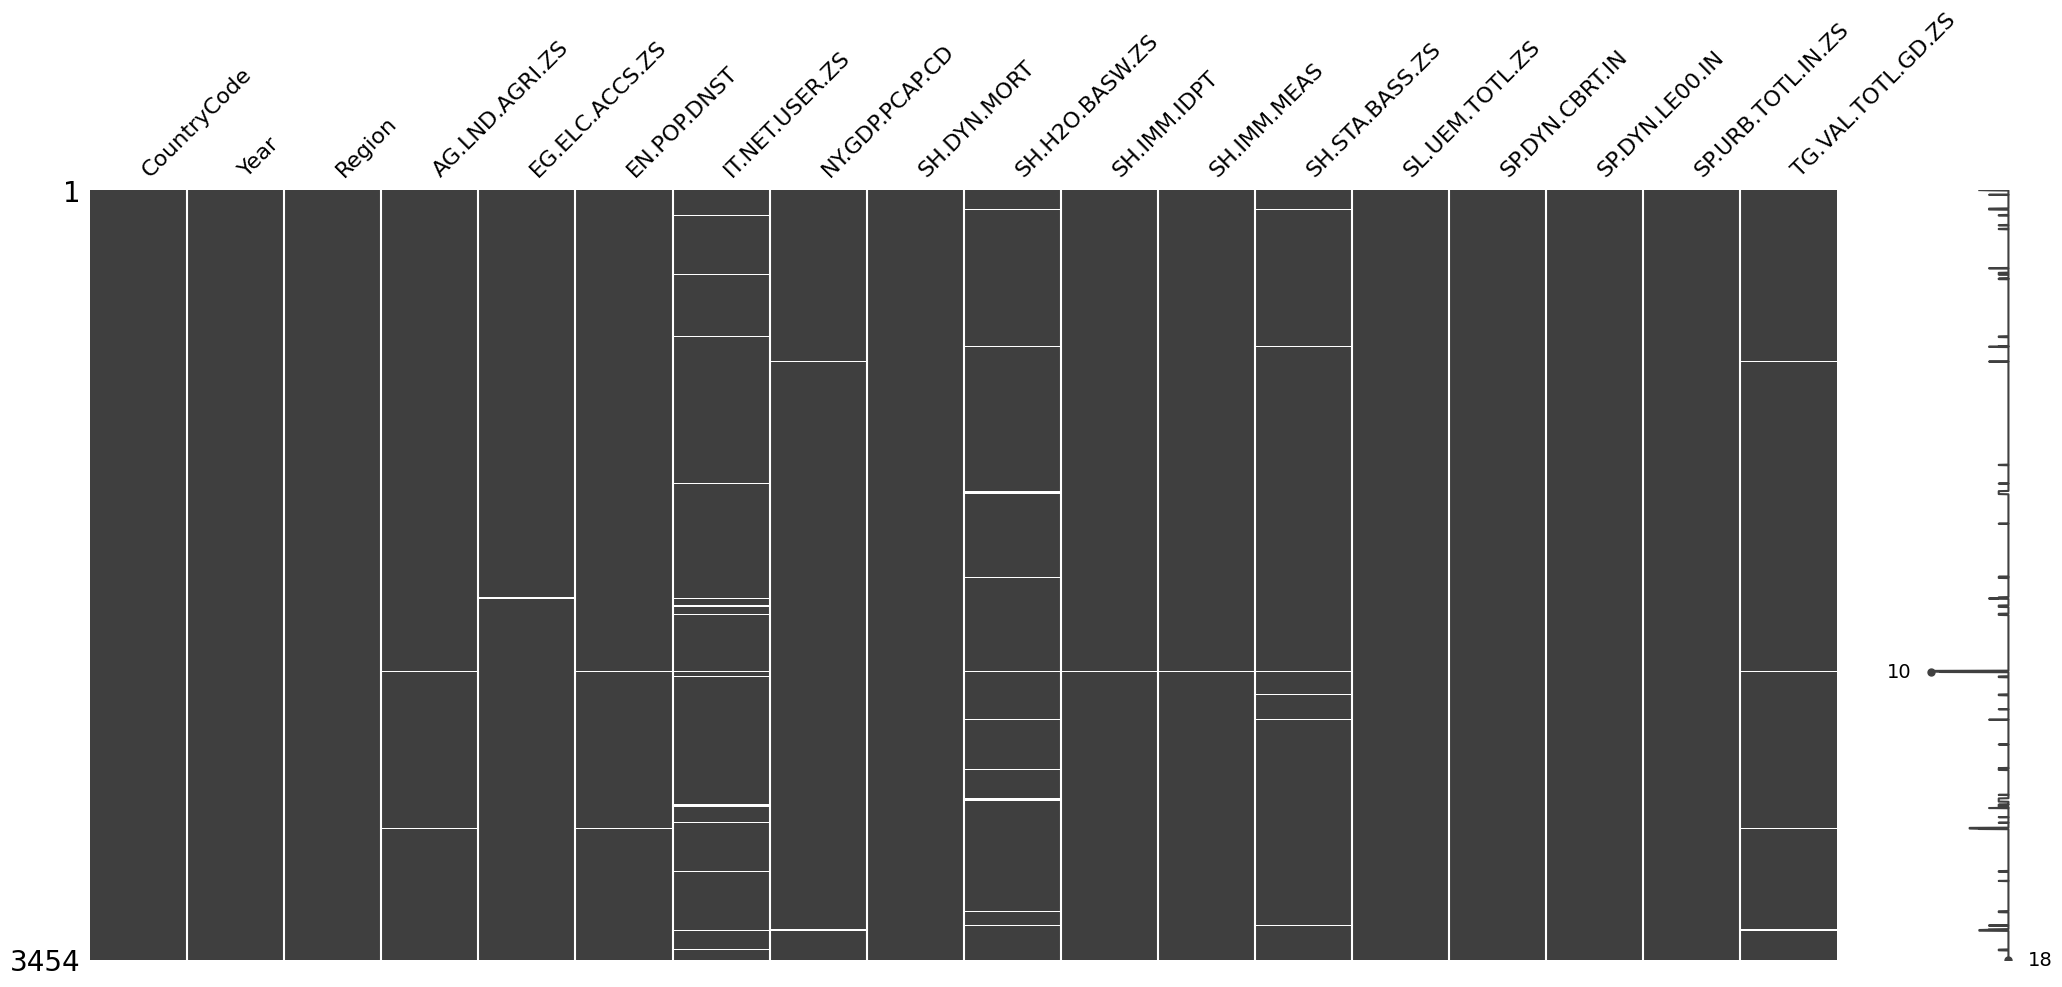

In [24]:
import missingno as msno
msno.matrix(dfinal)

In [25]:
nulos_por_columna = dfinal.isnull().sum()

columnas_con_nulos_ordenadas = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)
print(columnas_con_nulos_ordenadas)

IT.NET.USER.ZS       76
SH.H2O.BASW.ZS       60
SH.STA.BASS.ZS       29
TG.VAL.TOTL.GD.ZS    22
AG.LND.AGRI.ZS       12
EN.POP.DNST          12
NY.GDP.PCAP.CD       10
EG.ELC.ACCS.ZS        9
SH.IMM.IDPT           6
SH.IMM.MEAS           6
SL.UEM.TOTL.ZS        1
dtype: int64


Eliminamos las filas con valores nulos.

In [26]:
columnas_verificacion = ['IT.NET.USER.ZS','SH.H2O.BASW.ZS','SH.STA.BASS.ZS','TG.VAL.TOTL.GD.ZS',
                         'AG.LND.AGRI.ZS','EN.POP.DNST','NY.GDP.PCAP.CD','EG.ELC.ACCS.ZS','SH.IMM.IDPT','SH.IMM.MEAS','SL.UEM.TOTL.ZS']
dfinal = dfinal.dropna(subset=columnas_verificacion)

nulos_por_columna = dfinal.isnull().sum()

#Para verificar
print(nulos_por_columna)

CountryCode          0
Year                 0
Region               0
AG.LND.AGRI.ZS       0
EG.ELC.ACCS.ZS       0
EN.POP.DNST          0
IT.NET.USER.ZS       0
NY.GDP.PCAP.CD       0
SH.DYN.MORT          0
SH.H2O.BASW.ZS       0
SH.IMM.IDPT          0
SH.IMM.MEAS          0
SH.STA.BASS.ZS       0
SL.UEM.TOTL.ZS       0
SP.DYN.CBRT.IN       0
SP.DYN.LE00.IN       0
SP.URB.TOTL.IN.ZS    0
TG.VAL.TOTL.GD.ZS    0
dtype: int64


In [27]:
dfinal.dtypes

CountryCode          object
Year                  Int64
Region               object
AG.LND.AGRI.ZS       object
EG.ELC.ACCS.ZS       object
EN.POP.DNST          object
IT.NET.USER.ZS       object
NY.GDP.PCAP.CD       object
SH.DYN.MORT          object
SH.H2O.BASW.ZS       object
SH.IMM.IDPT          object
SH.IMM.MEAS          object
SH.STA.BASS.ZS       object
SL.UEM.TOTL.ZS       object
SP.DYN.CBRT.IN       object
SP.DYN.LE00.IN       object
SP.URB.TOTL.IN.ZS    object
TG.VAL.TOTL.GD.ZS    object
dtype: object

In [28]:
dfinal.iloc[:, 3:19] = dfinal.iloc[:, 3:18].astype(float)
dfinal.dtypes

CountryCode           object
Year                   Int64
Region                object
AG.LND.AGRI.ZS       float64
EG.ELC.ACCS.ZS       float64
EN.POP.DNST          float64
IT.NET.USER.ZS       float64
NY.GDP.PCAP.CD       float64
SH.DYN.MORT          float64
SH.H2O.BASW.ZS       float64
SH.IMM.IDPT          float64
SH.IMM.MEAS          float64
SH.STA.BASS.ZS       float64
SL.UEM.TOTL.ZS       float64
SP.DYN.CBRT.IN       float64
SP.DYN.LE00.IN       float64
SP.URB.TOTL.IN.ZS    float64
TG.VAL.TOTL.GD.ZS    float64
dtype: object

El nuevo dataframe tiene el siguiente tamaño:

In [29]:
filas2,columnas2 =dfinal.shape
print(f'La tabla final tiene {filas2} filas y {columnas2} columnas.')

La tabla final tiene 3299 filas y 18 columnas.


## 6. Data Engineering

### 6.1. Análisis Estadístico
Vamos a ver la cantidad de datos que tenemos para cada año.

In [30]:
conteo_por_año = dfinal['Year'].value_counts()

# 'conteo_por_año' contendrá la cantidad de valores para cada valor único de "Year"
conteo_por_año

2007    156
2016    154
2014    154
2013    153
2015    153
2017    153
2008    153
2009    153
2010    153
2011    153
2012    153
2006    152
2005    151
2002    150
2004    147
2019    147
2001    147
2003    146
2000    146
2020    144
2018    142
2021    139
Name: Year, dtype: Int64

Aplicamos la función "describe" a los datos de la esperanza de vida.

In [31]:
dfinal['SP.DYN.LE00.IN'].describe()

count    3299.000000
mean       70.628637
std         8.505670
min        44.518000
25%        65.445500
50%        72.365000
75%        77.068000
max        84.560000
Name: SP.DYN.LE00.IN, dtype: float64

Vamos a ver la distribución de los datos

Text(0.5, 0, 'Esperanza de vida')

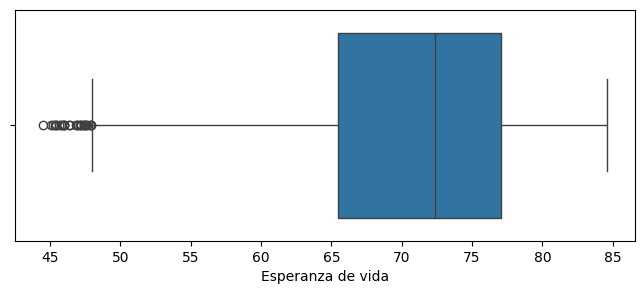

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

ax = sns.boxplot(x='SP.DYN.LE00.IN', data=dfinal)

plt.xlabel("Esperanza de vida")

Vamos a ver la distribución de los valores

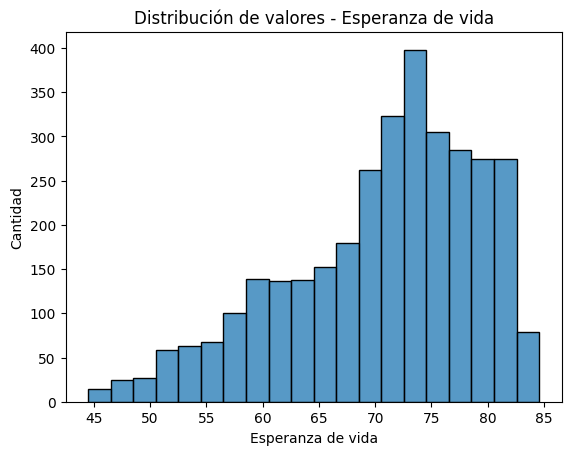

In [33]:
sns.histplot(data=dfinal, x='SP.DYN.LE00.IN',bins=20)

plt.xlabel("Esperanza de vida")
plt.ylabel("Cantidad")
plt.title("Distribución de valores - Esperanza de vida")
plt.show()

Podemos decir que la variable tiene una distribución asimétrica negativo o hacia la izquierda.

Vamos a ver la variabilidad de la esperanza de vida en cada continente

Text(0.5, 1.0, 'Variación Esperanza de Vida x continente')

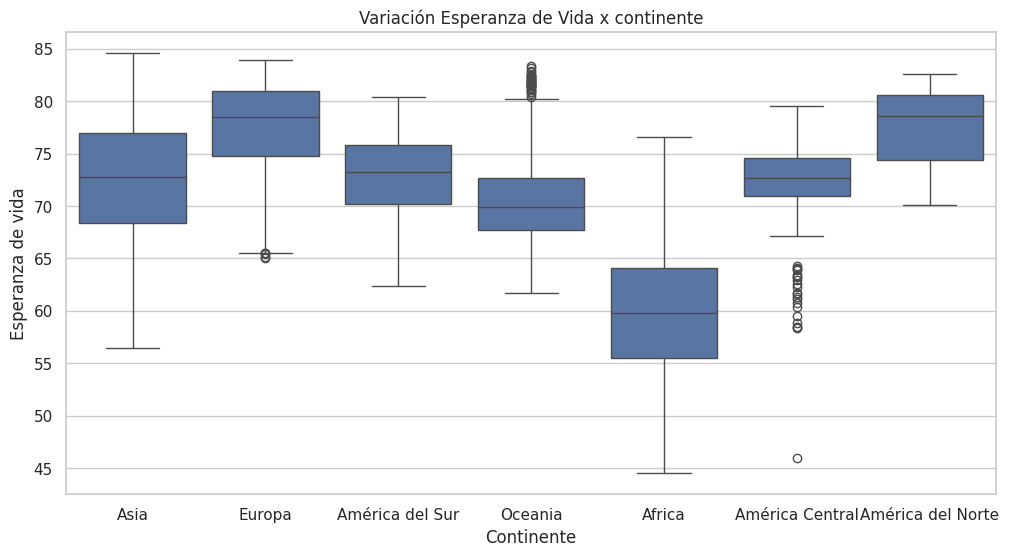

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.boxplot(x="Region", y='SP.DYN.LE00.IN', data=dfinal)

plt.xlabel("Continente")
plt.ylabel("Esperanza de vida")
plt.title("Variación Esperanza de Vida x continente")

Este gráfico nos muestra que hay una diferencia significativa en los valores correspondientes al continente africano, punto a analizar más adelante.

#### 6.1.1. Representación Cartográfica
En el siguiente gráfico vamos a representar la esperanza de vida en cada país (para el año 2021)

In [35]:
#Preparamos el dataframe
#Seleccionamos las filas que corresponden al año 2021
map_year = 2021
dfmap = dfinal[dfinal['Year'] == map_year][['CountryCode', 'SP.DYN.LE00.IN']]

#Renombramos la columna 'SP.DYN.LE00.IN'
dfmap = dfmap.rename(columns={'SP.DYN.LE00.IN': 'Esperanza<br>Vida'})

In [36]:
import plotly.express as px

#Creamos un mapa del mundo con Plotly Express
fig = px.choropleth(
    dfmap,
    locations='CountryCode',
    color='Esperanza<br>Vida',
    color_continuous_scale='PuBu',
    projection='orthographic',
    title='Mapa de Esperanza de Vida por País - Año 2021',
)

fig.update_traces(hovertemplate='<b>%{location}</b><br>Esp.Vida: %{z:.2f}')

fig.update_layout(height=600, width=600)

#Generamos el mapa interactivo
fig.show()

Del gráfico podemos ver que los mayores valores se encuentran en América del Norte, Europa y Australia; mientras que la menor esperanza de vida se encuentra en África.

NOTA: Los países representados en gris no tienen información disponible.

#### 6.1.2. Evolución de la esperanza de vida

In [37]:
#Creamos un dataframe con los valores promedios por continente y año.
df_espvida_avg = dfinal.groupby(['Year', 'Region'])['SP.DYN.LE00.IN'].mean().unstack('Region')

#Calculamos el promedio global por año
global_mean_year = dfinal.groupby('Year')['SP.DYN.LE00.IN'].mean()

#Agregamos la columna 'Global' al dataFrame'
df_espvida_avg['Global'] = global_mean_year

df_espvida_avg = df_espvida_avg.reset_index()

#Redondeamos los valores numéricos a 2 decimales, excepto la columna 'Year'
numeric_cols = df_espvida_avg.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Year')  #Sacamos la columna 'Year' de la lista de columnas numéricas

df_espvida_avg[numeric_cols] = df_espvida_avg[numeric_cols].round(decimals=2)

df_espvida_avg.head()

Region,Year,Africa,América Central,América del Norte,América del Sur,Asia,Europa,Oceania,Global
0,2000,55.66,70.35,76.37,70.39,69.62,75.12,70.23,67.48
1,2001,56.07,70.67,76.63,70.54,69.77,75.46,70.37,67.77
2,2002,56.36,70.86,76.82,70.94,69.93,75.56,69.09,67.86
3,2003,56.84,71.14,76.99,71.05,70.53,75.97,69.29,68.18
4,2004,57.34,71.23,77.18,71.47,70.63,76.44,69.46,68.52


In [38]:
import plotly.express as px

px.line(df_espvida_avg, x='Year',y=['Africa','América Central','América del Norte','América del Sur','Asia','Europa','Oceania','Global'], labels={'x':'Año', 'y':'Años'})

A pesar de la diferencia de valores, todas las regiones presentan una evolución similar a lo largo del tiempo. Se puede apreciar el descenso de los valores en el años 2020 (pandemia de Coronavirus).

### 6.2. API - Datos Población

Vamos a agregar los datos de la población mediante una API del World Bank

In [39]:
import requests

url = 'http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2000:2021&per_page=6000'

#Verificamos la respuesta
request = requests.get(url)

request

<Response [200]>

La información viene en formato XML, por lo que vamos a instalar otra librería para poder utilizar esta información.

In [40]:
!pip install xmltodict

import xmltodict

In [41]:
xml = xmltodict.parse(request.content)

xml

{'wb:data': {'@page': '1',
  '@pages': '1',
  '@per_page': '6000',
  '@total': '5852',
  '@sourceid': '2',
  '@lastupdated': '2023-12-18',
  '@xmlns:wb': 'http://www.worldbank.org',
  'wb:data': [{'wb:indicator': {'@id': 'SP.POP.TOTL',
     '#text': 'Population, total'},
    'wb:country': {'@id': 'ZH', '#text': 'Africa Eastern and Southern'},
    'wb:countryiso3code': 'AFE',
    'wb:date': '2021',
    'wb:value': '702977106',
    'wb:unit': None,
    'wb:obs_status': None,
    'wb:decimal': '0'},
   {'wb:indicator': {'@id': 'SP.POP.TOTL', '#text': 'Population, total'},
    'wb:country': {'@id': 'ZH', '#text': 'Africa Eastern and Southern'},
    'wb:countryiso3code': 'AFE',
    'wb:date': '2020',
    'wb:value': '685112979',
    'wb:unit': None,
    'wb:obs_status': None,
    'wb:decimal': '0'},
   {'wb:indicator': {'@id': 'SP.POP.TOTL', '#text': 'Population, total'},
    'wb:country': {'@id': 'ZH', '#text': 'Africa Eastern and Southern'},
    'wb:countryiso3code': 'AFE',
    'wb:date':

In [42]:
data_list = xml['wb:data']['wb:data']

#Creamos una lista de diccionarios con los datos deseados
data_records = []
for data_entry in data_list:
    record = {
        'wb:countryiso3code': data_entry['wb:countryiso3code'],
        'wb:date': data_entry['wb:date'],
        'wb:value': data_entry['wb:value']
    }
    data_records.append(record)

#Convertimos la lista de diccionarios a un DataFrame
dfapi = pd.DataFrame(data_records)

#Renombramos las columnas
dfapi.columns = ['CountryCode', 'Year', 'SP.POP.TOTL']

dfapi

,CountryCode,Year,SP.POP.TOTL
0,AFE,2021,702977106
1,AFE,2020,685112979
2,AFE,2019,667242986
3,AFE,2018,649757148
4,AFE,2017,632746570
...,...,...,...
5847,ZWE,2004,12160881
5848,ZWE,2003,12075828
5849,ZWE,2002,11984644
5850,ZWE,2001,11910978


In [43]:
dfapi.dtypes

CountryCode    object
Year           object
SP.POP.TOTL    object
dtype: object

In [44]:
#Hacemos que la columna Year y Población sean del tipo int para poder asociar las tablas
dfapi['Year'] = dfapi['Year'].astype(int)

dfinal2 = dfinal.merge(dfapi[['CountryCode', 'Year', 'SP.POP.TOTL']], on=['CountryCode', 'Year'], how='left')

dfinal2.dtypes

CountryCode           object
Year                   Int64
Region                object
AG.LND.AGRI.ZS       float64
EG.ELC.ACCS.ZS       float64
EN.POP.DNST          float64
IT.NET.USER.ZS       float64
NY.GDP.PCAP.CD       float64
SH.DYN.MORT          float64
SH.H2O.BASW.ZS       float64
SH.IMM.IDPT          float64
SH.IMM.MEAS          float64
SH.STA.BASS.ZS       float64
SL.UEM.TOTL.ZS       float64
SP.DYN.CBRT.IN       float64
SP.DYN.LE00.IN       float64
SP.URB.TOTL.IN.ZS    float64
TG.VAL.TOTL.GD.ZS    float64
SP.POP.TOTL           object
dtype: object

Modificamos el tipo de dato de la columna SP.POP.TOTL

In [45]:
dfinal2['SP.POP.TOTL'] = dfinal2['SP.POP.TOTL'].astype(float)

dfinal2.dtypes

CountryCode           object
Year                   Int64
Region                object
AG.LND.AGRI.ZS       float64
EG.ELC.ACCS.ZS       float64
EN.POP.DNST          float64
IT.NET.USER.ZS       float64
NY.GDP.PCAP.CD       float64
SH.DYN.MORT          float64
SH.H2O.BASW.ZS       float64
SH.IMM.IDPT          float64
SH.IMM.MEAS          float64
SH.STA.BASS.ZS       float64
SL.UEM.TOTL.ZS       float64
SP.DYN.CBRT.IN       float64
SP.DYN.LE00.IN       float64
SP.URB.TOTL.IN.ZS    float64
TG.VAL.TOTL.GD.ZS    float64
SP.POP.TOTL          float64
dtype: object

Verificamos que no haya valores nulos

In [46]:
nulos_por_columna = dfinal2.isnull().sum()

#Para verificar
print(nulos_por_columna)

CountryCode          0
Year                 0
Region               0
AG.LND.AGRI.ZS       0
EG.ELC.ACCS.ZS       0
EN.POP.DNST          0
IT.NET.USER.ZS       0
NY.GDP.PCAP.CD       0
SH.DYN.MORT          0
SH.H2O.BASW.ZS       0
SH.IMM.IDPT          0
SH.IMM.MEAS          0
SH.STA.BASS.ZS       0
SL.UEM.TOTL.ZS       0
SP.DYN.CBRT.IN       0
SP.DYN.LE00.IN       0
SP.URB.TOTL.IN.ZS    0
TG.VAL.TOTL.GD.ZS    0
SP.POP.TOTL          0
dtype: int64


### 6.3. Feature Engineering

Para el análisis, vamos a tomar solo los últimos 5 años de datos (2017-2021).

In [47]:
#Creamos un nuevo dataframe, solo con los datos del 2017 al 2021
inicio = 2017
final = 2021

df5yrs = dfinal2[(dfinal2['Year'] >= inicio) & (dfinal2['Year'] <= final)]
df5yrs = df5yrs.reset_index(drop=True)

#### 6.3.1. Selección Inicial de Columnas

Vamos a trabajar con las columnas seleccionadas anteriormente que, consideramos, puedan tener algún grado de causalidad con la esperanza de vida. Los valores seleccionados son los siguientes:

* AG.LND.AGRI.ZS - Territorio agrícola (% territorio)
* EG.ELC.ACCS.ZS - Acceso a la electricidad (% de la población)
* EN.POP.DNST - Densidad de población (personas por km2)
* IT.NET.USER.ZS - Usuarios de internet (% de la población)
* NY.GDP.PCAP.CD - PBI per capita (USD)
* SH.DYN.MORT - Tasa de mortalidad infantil (cada 1.000 vivos)
* SH.H2O.BASW.ZS - Acceso al agua potable (% de la población)
* SH.IMM.IDPT: Vacunación DPT (% chicos entre 1 y 2 años)
* SH.IMM.MEAS: Vacunación Sarampión (% chicos entre 1 y 2 años)
* SH.STA.BASS.ZS - Acceso a servicios sanitarios básicos (% de la población)
* SL.UEM.TOTL.ZS - Desempleo (% población en edad de trabajo)
* SP.DYN.CBRT.IN - Tasa de nacimiento (cada 1.000 personas)
* SP.DYN.LE00.IN - Esperanza de vida (años)
* SP.POP.TOTL - Población (personas)
* SP.URB.TOTL.IN.ZS: Población urbana (% del total)
* TG.VAL.TOTL.GD.ZS: Comercio (% PBI)

Vamos a revisar los tipos de valores.

In [48]:
df5yrs.dtypes

CountryCode           object
Year                   Int64
Region                object
AG.LND.AGRI.ZS       float64
EG.ELC.ACCS.ZS       float64
EN.POP.DNST          float64
IT.NET.USER.ZS       float64
NY.GDP.PCAP.CD       float64
SH.DYN.MORT          float64
SH.H2O.BASW.ZS       float64
SH.IMM.IDPT          float64
SH.IMM.MEAS          float64
SH.STA.BASS.ZS       float64
SL.UEM.TOTL.ZS       float64
SP.DYN.CBRT.IN       float64
SP.DYN.LE00.IN       float64
SP.URB.TOTL.IN.ZS    float64
TG.VAL.TOTL.GD.ZS    float64
SP.POP.TOTL          float64
dtype: object

In [49]:
#Creamos un nuevo dataframe, solo con los datos de las variables
dfeature_selection = df5yrs.iloc[:, 3:]

Vamos a representar la correlación existente entre las variables elegidas.

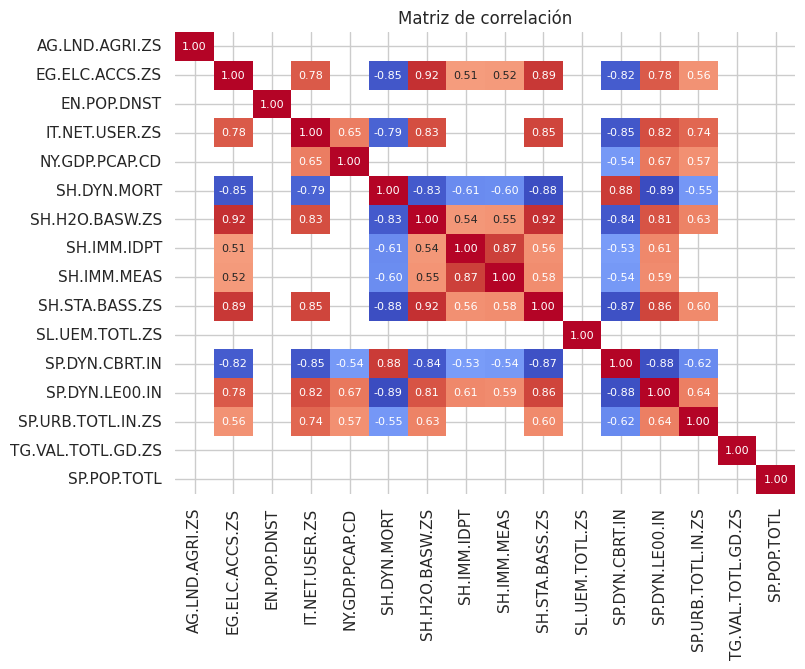

In [50]:
#Calculamos la matriz de correlación
correlation_matrix = dfeature_selection.corr()

#Agregamos una máscara para mostrar valores mayores a 0.5 o menores a -0.5
mask = np.abs(correlation_matrix) >= 0.5
masked_corr_matrix = correlation_matrix[mask]

#Graficamos un heatmap con la máscara
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=~mask, cbar=False, annot_kws={"size": 8})

plt.title('Matriz de correlación')
plt.show()

## 7. Selección y Desarrollo del Algoritmo

### 7.1. Regresión Lineal Múltiple

Vamos a utilizar un algoritmo de regresión lineal múltiple.

#### 7.1.1. Selección de variables

##### 7.1.1.1. Forward Selection

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

#Dividimos los datos entre características (X) y variable objetivo (y)
X = dfeature_selection.drop('SP.DYN.LE00.IN', axis=1)
y = dfeature_selection['SP.DYN.LE00.IN']

In [52]:
#Seleccionamos las variables que participarán del modelo con el método Forward Selection
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [53]:
forward_selection(X,y)

['SH.DYN.MORT',
 'NY.GDP.PCAP.CD',
 'SP.DYN.CBRT.IN',
 'EN.POP.DNST',
 'SH.STA.BASS.ZS',
 'AG.LND.AGRI.ZS',
 'SH.IMM.IDPT',
 'TG.VAL.TOTL.GD.ZS',
 'SP.URB.TOTL.IN.ZS',
 'IT.NET.USER.ZS',
 'SH.H2O.BASW.ZS']

Del análisis anterior, se definen 11 variables a analizar.

* AG.LND.AGRI.ZS: Territorio agrícola (% territorio)
* EN.POP.DNST: Densidad de población (personas por km2)
* IT.NET.USER.ZS: Uso de Internet (% de la población)
* NY.GDP.PCAP.CD: PBI per capita (USD)
* SH.DYN.MORT: Tasa de mortalidad infantil (cada 1.000 vivos)
* SH.H2O.BASW.ZS: Acceso al agua potable (% de la población)
* SH.IMM.IDPT: Vacunación DPT (% chicos entre 1 y 2 años)
* SH.STA.BASS.ZS: Acceso a servicios sanitarios básicos (% de la población)
* SP.DYN.CBRT.IN: Tasa de nacimiento (cada 1.000 personas)
* SP.URB.TOTL.IN.ZS: Población urbana (% del total)
* TG.VAL.TOTL.GD.ZS: Comercio (% PBI)

##### 7.1.1.2. Backward Selection

In [54]:
#Dividimos los datos entre características (X) y variable objetivo (y)
X = dfeature_selection.drop('SP.DYN.LE00.IN', axis=1)
y = dfeature_selection['SP.DYN.LE00.IN']

#Seleccionamos las variables que participarán del modelo con el método Backward Selection
def backward_selection(X, y, threshold=0.05):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        p_values = model.pvalues[1:]  # Excluye el p-valor de la constante
        max_p_value = p_values.max()
        if max_p_value > threshold:
            changed = True
            excluded_feature = p_values.idxmax()
            included.remove(excluded_feature)
        if not changed:
            break
    return included

In [55]:
backward_selection(X,y)

['AG.LND.AGRI.ZS',
 'EN.POP.DNST',
 'IT.NET.USER.ZS',
 'NY.GDP.PCAP.CD',
 'SH.DYN.MORT',
 'SH.H2O.BASW.ZS',
 'SH.IMM.IDPT',
 'SH.STA.BASS.ZS',
 'SP.DYN.CBRT.IN',
 'SP.URB.TOTL.IN.ZS',
 'TG.VAL.TOTL.GD.ZS']

Este nuevo análisis determina las mismas variables definidas con el método anterior.


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression

#Creamos el modelo
lr = LinearRegression()
#Ajustamos el modelo con X_train y y_train
lr.fit(X_train,y_train)
#Predecir con X_test
y_pred = lr.predict(X_test)

#### 7.1.2. Métricas del algoritmo

Vamos a analizar los valores de las métricas de los diferentes modelos de selección de variables.


* RMSE - Error Cuadrático Medio

Representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado. Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo.

* MAE - Error Absoluto Medio

Es la diferencia absoluta entre el valor objetivo y el valor predicho por el modelo. Es más robusto para los valores atípicos y no penaliza los errores tan extremadamente como el MSE.

* R^2

Indica la bondad o la aptitud del modelo, a menudo se utiliza con fines descriptivos y muestra que también las variables independientes seleccionadas explican la variabilidad en sus variables dependientes.

R^2 tiene la propiedad útil de que su escala es intuitiva, va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medido y 1 indica una predicción perfecta.


In [57]:
selected_features_forward = forward_selection(X_train, y_train)
selected_features_backward = backward_selection(X_train, y_train)

#Filtramos los conjuntos de entrenamiento y prueba con las características seleccionadas
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]

X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]

#Calculamos las métricas
model_forward = LinearRegression()
model_forward.fit(X_train_forward, y_train)
y_pred_forward = model_forward.predict(X_test_forward)

rmseF = np.sqrt(mean_squared_error(y_test, y_pred_forward))
maeF = mean_absolute_error(y_test,y_pred_forward)
r2F = r2_score(y_test, y_pred_forward)

model_backward = LinearRegression()
model_backward.fit(X_train_backward, y_train)
y_pred_backward = model_backward.predict(X_test_backward)

rmseB = np.sqrt(mean_squared_error(y_test, y_pred_backward))
maeB = mean_absolute_error(y_test,y_pred_backward)
r2B = r2_score(y_test, y_pred_backward)

# Imprime las métricas
print("Forward Selection - RMSE: {:.3f} años, MAE: {:.3f} años, R2: {:.3f}".format(rmseF, maeF, r2F))
print("Backward Selection - RMSE: {:.3f} años, MAE: {:.3f} años, R2: {:.3f}".format(rmseB, maeB, r2B))


Forward Selection - RMSE: 2.406 años, MAE: 1.892 años, R2: 0.895
Backward Selection - RMSE: 2.383 años, MAE: 1.871 años, R2: 0.897


De los valores de las métricas, podemos despreden que el modelo utilizado es válido para la estimación de la esperanza de vida a partir de los datos de los indicadores seleccionados.
Tiene un márgen de error de menos de 2 años sobre el valor pronosticado.

Para ver los coeficientes del algoritmo, vamos a elegir Backward Selection

#### 7.1.3. Coeficientes del algoritmo

Los coeficientes son los siguientes:

In [58]:
regressor = LinearRegression()
regressor.fit(X_train_backward, y_train)

#Recuperamos la intersección
interseccion = regressor.intercept_

print(f'La intersección es: {round(interseccion,4)}')

La intersección es: 71.2293


In [59]:
#La pendiente
print(regressor.coef_)

[-2.66866831e-02  1.82161396e-03 -2.70244570e-02  8.92608824e-05
 -1.05441185e-01 -3.75110852e-02  5.50139769e-02  6.95841634e-02
 -1.55029573e-01  3.28912861e-02 -1.08353427e-02]


In [100]:
#Los coeficientes de las variables son

coeficientes = regressor.coef_
nombres_columnas = X_train_backward.columns

#Creamos un DataFrame para mostrar los coeficientes con sus nombres de columna correspondientes
coeficientes_df = pd.DataFrame({'Feature': nombres_columnas, 'Coefficient': coeficientes})

coeficientes_df

,Feature,Coefficient
0,AG.LND.AGRI.ZS,-0.026687
1,EN.POP.DNST,0.001822
2,IT.NET.USER.ZS,-0.027024
3,NY.GDP.PCAP.CD,0.000089
4,SH.DYN.MORT,-0.105441
5,SH.H2O.BASW.ZS,-0.037511
6,SH.IMM.IDPT,0.055014
7,SH.STA.BASS.ZS,0.069584
8,SP.DYN.CBRT.IN,-0.155030
9,SP.URB.TOTL.IN.ZS,0.032891


### 7.2. Rendom Forest Regressor

#### 7.2.1. Selección de variables

In [61]:
from sklearn.ensemble import RandomForestRegressor

#Dividimos los datos entre características (X) y variable objetivo (y)
X = dfeature_selection.drop('SP.DYN.LE00.IN', axis=1)
y = dfeature_selection['SP.DYN.LE00.IN']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_trainRF, y_trainRF)

# Realizar predicciones en el conjunto de prueba
y_predRF = rf_regressor.predict(X_testRF)

#### 7.2.2. Métricas del algoritmo

Vamos a analizar los valores de las métricas del modelo de Random Forest.

In [62]:
rmseRF = np.sqrt(mean_squared_error(y_testRF, y_predRF))
maeRF = mean_absolute_error(y_testRF,y_predRF)
r2RF = r2_score(y_testRF, y_predRF)

# Imprime las métricas
print("Random Forest - RMSE: {:.3f} años, MAE: {:.3f} años, R2: {:.3f}".format(rmseRF, maeRF, r2RF))

Random Forest - RMSE: 1.238 años, MAE: 0.795 años, R2: 0.970


Este método tiene mejores resultados que la regresión lineal.

## 8. Análisis de las variables

* AG.LND.AGRI.ZS: Territorio agrícola (% territorio)
* EN.POP.DNST: Densidad de población (personas por km2)
* IT.NET.USER.ZS: Uso de Internet (% de la población)
* NY.GDP.PCAP.CD: PBI per capita (USD)
* SH.DYN.MORT: Tasa de mortalidad infantil (cada 1.000 vivos)
* SH.H2O.BASW.ZS: Acceso al agua potable (% de la población)
* SH.IMM.IDPT: Vacunación DPT (% chicos entre 1 y 2 años)
* SH.STA.BASS.ZS: Acceso a servicios sanitarios básicos (% de la población)
* SP.DYN.CBRT.IN: Tasa de nacimiento (cada 1.000 personas)
* SP.URB.TOTL.IN.ZS: Población urbana (% del total)
* TG.VAL.TOTL.GD.ZS: Comercio (% PBI)

Vamos a crear un nuevo dataframe con las variables seleccionadas.

In [63]:
df_varselec = df5yrs[[
    'CountryCode', 'Year', 'Region',
    'SP.DYN.LE00.IN',
    'AG.LND.AGRI.ZS',
    'EN.POP.DNST',
    'IT.NET.USER.ZS',
    'NY.GDP.PCAP.CD',
    'SH.DYN.MORT',
    'SH.H2O.BASW.ZS',
    'SH.IMM.IDPT',
    'SH.STA.BASS.ZS',
    'SP.DYN.CBRT.IN',
    'SP.URB.TOTL.IN.ZS',
    'TG.VAL.TOTL.GD.ZS']]

df_varselec.head()

,CountryCode,Year,Region,SP.DYN.LE00.IN,AG.LND.AGRI.ZS,EN.POP.DNST,IT.NET.USER.ZS,NY.GDP.PCAP.CD,SH.DYN.MORT,SH.H2O.BASW.ZS,SH.IMM.IDPT,SH.STA.BASS.ZS,SP.DYN.CBRT.IN,SP.URB.TOTL.IN.ZS,TG.VAL.TOTL.GD.ZS
0,AFG,2017,Asia,63.016,58.123668,54.648541,13.5,530.149863,64.6,68.008872,66.0,47.477616,37.342,25.250,41.214302
1,AFG,2018,Asia,63.081,58.276988,56.248231,16.8,502.057099,62.2,70.879941,72.0,49.234144,36.927,25.495,44.964780
2,AFG,2019,Asia,63.565,58.276988,57.908252,17.6,500.522981,59.9,73.784643,72.0,51.003481,36.466,25.754,40.418943
3,AFG,2020,Asia,62.575,58.741548,59.752281,18.4,516.866797,57.8,76.722255,70.0,52.649001,36.051,26.026,36.314531
4,ALB,2017,Europa,79.047,42.856971,104.870693,62.4,4531.032207,9.3,94.102096,99.0,98.547298,10.870,59.383,58.088779


Vamos a renombrar las columnas para facilitar el análisis.

In [64]:
df_varselec.rename(columns={
    'SP.DYN.LE00.IN': 'Esp.Vida',
    'SH.DYN.MORT': 'Mort.Inf.',
    'NY.GDP.PCAP.CD': 'PBI',
    'SP.DYN.CBRT.IN': 'TasaNacim.',
    'SH.STA.BASS.ZS': 'Serv.Sanit.',
    'EN.POP.DNST': 'Dens.Pobl.',
    'IT.NET.USER.ZS': 'Internet',
    'AG.LND.AGRI.ZS': '%Terr.Agri.',
    'SH.IMM.IDPT': 'Vacun.DPT',
    'SP.URB.TOTL.IN.ZS': 'Pobl.Urb.',
    'TG.VAL.TOTL.GD.ZS': 'Comercio',
    'SH.H2O.BASW.ZS': 'AguaPot.'}, inplace=True)

df_varselec.head()

,CountryCode,Year,Region,Esp.Vida,%Terr.Agri.,Dens.Pobl.,Internet,PBI,Mort.Inf.,AguaPot.,Vacun.DPT,Serv.Sanit.,TasaNacim.,Pobl.Urb.,Comercio
0,AFG,2017,Asia,63.016,58.123668,54.648541,13.5,530.149863,64.6,68.008872,66.0,47.477616,37.342,25.250,41.214302
1,AFG,2018,Asia,63.081,58.276988,56.248231,16.8,502.057099,62.2,70.879941,72.0,49.234144,36.927,25.495,44.964780
2,AFG,2019,Asia,63.565,58.276988,57.908252,17.6,500.522981,59.9,73.784643,72.0,51.003481,36.466,25.754,40.418943
3,AFG,2020,Asia,62.575,58.741548,59.752281,18.4,516.866797,57.8,76.722255,70.0,52.649001,36.051,26.026,36.314531
4,ALB,2017,Europa,79.047,42.856971,104.870693,62.4,4531.032207,9.3,94.102096,99.0,98.547298,10.870,59.383,58.088779


<Figure size 768x576 with 0 Axes>

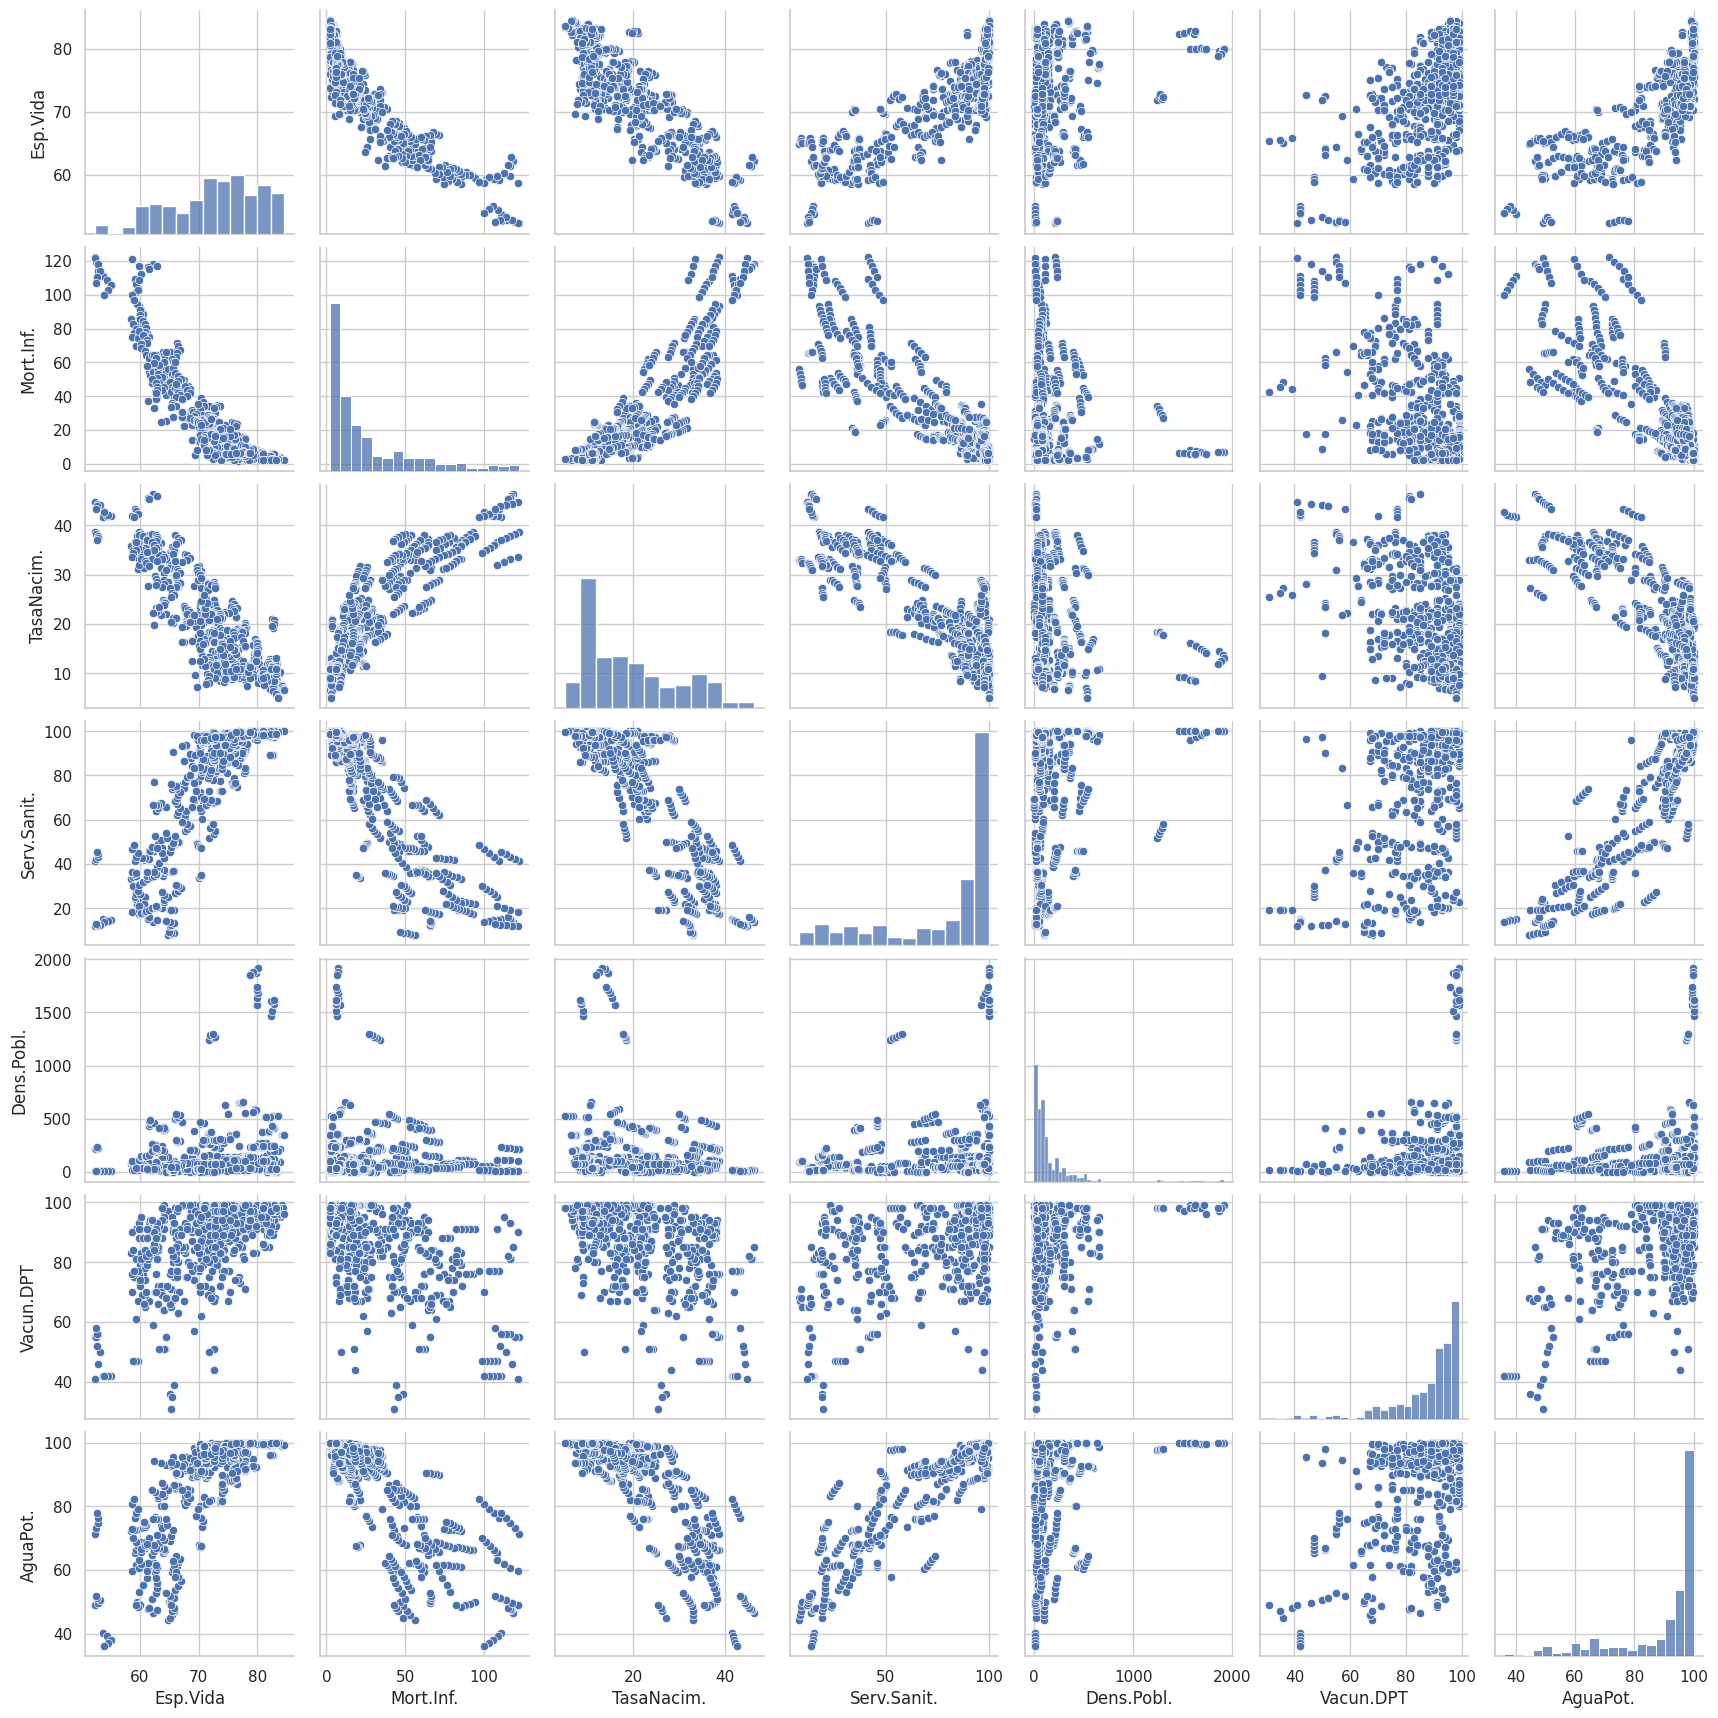

In [65]:
#Creamos un Pairplot del dataset con los indicadores del ámbito de la salud.
plt.figure(dpi=120)
sns.pairplot(df_varselec[['Esp.Vida',
    'Mort.Inf.',
    'TasaNacim.',
    'Serv.Sanit.',
    'Dens.Pobl.',
    'Vacun.DPT',
    'AguaPot.']])

plt.show()

## 9. Storytelling - Análisis del PBI

In [66]:
#Vamos a utilizar los datos iniciales.
dfst = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD']

#Eliminamos las columnas que identificar los indicadores. Al ser un único indicador, no tienen ningún fin.
columnas_a_eliminar = ['Country Name', 'Indicator Code', 'Indicator Name']
dfpbi = dfst.drop(columnas_a_eliminar, axis=1).reset_index(drop=True)

dfpbi

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFE,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,223.040659,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
1,AFW,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,129.123648,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
2,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299.969974,...,7348.849550,7302.250350,6283.256026,6113.397738,6224.522970,6573.816970,6498.529037,5639.398735,6414.725618,7655.848402
3,CSS,446.724344,475.196775,493.291450,515.430227,546.452701,578.953997,618.508771,654.127062,640.562148,...,10542.075211,10711.778657,10447.679948,9769.469641,10061.086612,10339.100779,10409.716383,8864.604370,10114.146841,12382.375376
4,CEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13665.726598,14141.100616,12525.632700,12782.222240,14222.454291,16077.023947,16349.005358,16298.267059,18790.418160,19337.889031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,VIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34597.976694,33045.364380,34007.352941,35324.974887,35365.069304,36653.863048,38596.030712,39552.168595,NaN,NaN
262,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3315.297539,3352.112595,3272.154324,3527.613824,3620.360487,3562.330943,3656.858271,3233.568638,3678.635657,3789.327966
263,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
264,ZMB,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [67]:
#Renombramos la columna 'Country Code'
dfpbi.rename(columns={'Country Code': 'CountryCode'}, inplace=True)

#Vamos a agregar la columna "Región" al dataframe.
dfpbi2 = dfpbi.merge(dp[['CountryCode', 'Region']], on='CountryCode', how='left')

#Y eliminamos esas filas
dfpbi_pais = dfpbi2.dropna(subset=['Region'])

dfpbi_pais

,CountryCode,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Region
49,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,Asia
50,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4578.633208,3952.803584,4124.055390,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519,Europa
51,DZA,239.033006,209.917177,169.927013,225.823391,238.877805,253.309059,241.002572,261.366234,292.028984,...,5516.229463,4197.419971,3967.200660,4134.936099,4171.795309,4021.983608,3354.157303,3700.311195,4273.922183,Africa
56,ARG,NaN,NaN,1163.186836,855.275656,1179.504098,1285.260799,1277.968419,1065.898520,1143.810428,...,12334.798245,13789.060425,12790.264064,14613.035715,11795.162885,9963.674231,8496.428157,10636.115530,13686.008674,América del Sur
57,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4017.229913,3666.141825,3679.952349,4041.995072,4391.923274,4828.504889,4505.867746,4966.513471,7014.206592,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,VUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2861.203164,2643.886894,2757.203306,3032.197020,3076.835315,3076.589886,2917.756849,3044.573640,3010.292173,Oceania
259,VEN,939.560806,954.355361,1006.879977,1060.570324,874.199411,869.906867,877.196049,894.683818,940.201420,...,15975.729375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,América del Sur
260,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2558.778924,2595.234979,2760.717101,2992.071746,3267.225009,3491.091279,3586.347297,3756.489122,4163.514300,Asia
263,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385,Asia


In [68]:
dfpbi_cont = dfpbi_pais.groupby('Region').mean().reset_index()

dfpbi_cont

,Region,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa,150.548059,155.783714,159.333337,165.021275,180.432284,189.816509,192.908767,191.457505,200.449467,...,2376.330770,2323.741958,2029.088927,2007.989554,2158.051994,2252.530252,2212.707691,1976.493394,2152.219407,2251.156060
1,América Central,389.346962,405.795930,425.125271,449.986225,474.956493,487.791607,515.552412,545.927787,563.882294,...,8733.583050,9026.697233,9198.027600,9231.351901,9563.066596,9835.580350,10023.131290,8604.252836,9570.930638,10776.190445
2,América del Norte,1875.318935,1895.072623,1968.452730,2057.729776,2204.958387,2369.635471,2581.274397,2711.769419,2927.012912,...,38930.663313,39051.994075,36704.088517,36352.476903,38157.187246,39742.704036,40546.566681,38511.103161,44207.923489,47485.462003
3,América del Sur,389.705303,410.649845,499.477021,475.796155,523.065245,513.984147,537.836028,525.563206,534.544066,...,9729.047287,9890.269454,8640.512715,8241.558079,9061.208107,8935.740704,8509.792276,7393.717944,8678.174381,10311.457412
4,Asia,237.090312,254.864807,228.828646,251.158079,271.958603,494.630635,525.416858,498.389191,516.741785,...,13552.954282,13324.743970,11382.559814,11163.577917,11730.505542,12537.291106,12424.840648,11173.329583,12895.541774,15192.202600
5,Europa,1184.762870,1267.680203,1360.249722,1477.475531,1652.949184,1797.001007,1975.589750,2082.646842,2124.412643,...,32105.946457,32726.134287,28654.889843,29100.497746,31035.908688,33512.517426,32814.164873,32194.877351,36923.925334,37009.507044
6,Oceania,1129.790474,1155.844620,1179.013662,1253.057789,1348.223456,1225.199007,1254.871727,1089.064989,1062.955634,...,16447.763403,16038.327326,14486.505165,13834.219246,14888.767326,15433.448034,15120.279268,14322.720849,16411.554499,18576.329921


Vamos a analizar las diferentes regiones.

In [69]:
dfpbi_cont.set_index('Region', inplace=True)

# Transponer el DataFrame para tener los años en el eje x
df_transposed = dfpbi_cont.T.reset_index()

# Crear el gráfico de líneas con Plotly Express
fig = px.line(df_transposed, x='index', y=df_transposed.columns[1:], title='Evolución del PBI de cada región')
fig.update_layout(xaxis_title='Año', yaxis_title='PBI')
fig.show()

In [70]:
#Filtramos por la región a analizar
paises_ue = ['DEU','BEL','FRA','ITA','LUX','NLD','DNK','IRL','GRC','ESP','PRT','AUT','SWE','FIN']
df_region = dfpbi_pais[dfpbi_pais['CountryCode'].isin(paises_ue)]

#Elegimos las columnas
columnas_interes = ['CountryCode'] + [str(i) for i in range(1960, 2022)]  # Lista de columnas desde '1960' hasta '2021'
df_filtered = df_region[columnas_interes]

#Hacemos una transposición para acomodar los datos
df_transposed = df_filtered.set_index('CountryCode').T.reset_index()

#GEneramos el gráfico de líneas con Plotly Express
fig = px.line(df_transposed, x='index', y=df_transposed.columns[1:], title=f'Evolución del PBI en la Unión Europea')
fig.update_layout(xaxis_title='Año', yaxis_title='PBI')
fig.show()

¿Pasa lo mismo con otras agrupaciones y/o tratados económicos?

Vamos a analizar el Mercosur

In [71]:
#Filtramos por la región a analizar
paises_mercosur = ['ARG','BRA','BOL','PRY','URY','VEN']
df_region = dfpbi_pais[dfpbi_pais['CountryCode'].isin(paises_mercosur)]

#Elegimos las columnas
columnas_interes = ['CountryCode'] + [str(i) for i in range(1960, 2022)]  # Lista de columnas desde '1960' hasta '2021'
df_filtered = df_region[columnas_interes]

#Hacemos una transposición para acomodar los datos
df_transposed = df_filtered.set_index('CountryCode').T.reset_index()

#GEneramos el gráfico de líneas con Plotly Express
fig = px.line(df_transposed, x='index', y=df_transposed.columns[1:], title=f'Evolución del PBI en el Mercosur')
fig.update_layout(xaxis_title='Año', yaxis_title='PBI')
fig.show()

Vamos a analizar el tratado de libre comercio de América del Norte.

In [72]:
#Filtramos por la región a analizar
paises_nafta = ['USA','MEX','CAN']
df_region = dfpbi_pais[dfpbi_pais['CountryCode'].isin(paises_nafta)]

#Elegimos las columnas
columnas_interes = ['CountryCode'] + [str(i) for i in range(1960, 2022)]  # Lista de columnas desde '1960' hasta '2021'
df_filtered = df_region[columnas_interes]

#Hacemos una transposición para acomodar los datos
df_transposed = df_filtered.set_index('CountryCode').T.reset_index()

#GEneramos el gráfico de líneas con Plotly Express
fig = px.line(df_transposed, x='index', y=df_transposed.columns[1:], title=f'Evolución del PBI en el NAFTA')
fig.update_layout(xaxis_title='Año', yaxis_title='PBI')
fig.show()

Esto se debe a que la Unión Europea, a diferencia de otras agrupaciones económicas y/o tratados de libre comercio), es una agrupación con objetivos comunes en el área política, social y económica. Las políticas de la UE, comunes a todos los países que la integran, hacen que tengan un comportamiento económico similar.

## 10. Selección y Desarrollo del Algoritmo (Parte 2)

Vamos a realizar los mismos pasos del punto 7, pero sobre el dataset completo, sin seleccionar unas pocas columnas para su análisis.

In [73]:
dfcleaned

,CountryCode,Year,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,VA.EST,VA.NO.SRC,VA.PER.RNK,VA.PER.RNK.LOWER,VA.PER.RNK.UPPER,VA.STD.ERR,Region
48,AFG,2000,0.650787,377940.0,57.945817,7683000.0,0.393133,11.779587,2406000.0,0.170185,...,NaN,NaN,NaN,-2.031417,4.0,0.995025,0.0,5.472637,0.254043,Asia
49,AFG,2001,2.394898,377950.0,57.94735,7683000.0,0.390225,11.779587,2094000.0,0.171719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
50,AFG,2002,3.19439,377900.0,57.939684,7678000.0,0.365615,11.771921,2238000.0,0.171719,...,NaN,NaN,NaN,-1.433421,6.0,9.452736,2.985075,14.925373,0.189453,Asia
51,AFG,2003,3.478546,378840.0,58.083805,7772000.0,0.343208,11.916042,3004700.0,0.171719,...,NaN,NaN,NaN,-1.177571,5.0,14.42786,6.965174,24.378109,0.207045,Asia
52,AFG,2004,4.243778,379280.0,58.151266,7816000.0,0.33184,11.983503,2667000.0,0.171719,...,NaN,NaN,NaN,-1.203034,7.0,15.384615,7.211538,21.634615,0.17559,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,ZMB,2017,72.052916,238390.0,32.067959,3800000.0,0.219678,5.111718,1564347.0,0.052462,...,864940286.949804,5.64217,75.444767,-0.335554,14.0,36.453201,32.019703,41.871922,0.122421,Africa
6354,ZMB,2018,52.513334,238390.0,32.067959,3800000.0,0.213054,5.111718,1200537.0,0.052462,...,953204795.028419,5.641553,77.862845,-0.336164,14.0,35.436893,30.582523,39.805824,0.126686,Africa
6355,ZMB,2019,67.5756,238390.0,32.067959,3800000.0,0.206741,5.111718,927238.0,0.052462,...,1011822349.75931,4.206893,80.965044,-0.30962,13.0,35.748791,31.884058,41.062801,0.120453,Africa
6356,ZMB,2020,79.764039,238390.0,32.067959,3800000.0,0.200764,5.111718,1486760.0,0.052462,...,555624813.639169,8.308675,74.070918,-0.428919,13.0,34.782608,29.951691,37.68116,0.12023,Africa


In [74]:
#Creamos un nuevo dataframe, solo con los datos del 2017 al 2021
inicio = 2017
final = 2021

df5yrsV2 = dfcleaned[(dfcleaned['Year'] >= inicio) & (dfcleaned['Year'] <= final)]
df5yrsV2 = df5yrsV2.reset_index(drop=True)

df5yrsV2

,CountryCode,Year,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,TX.VAL.SERV.CD.WT,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,VA.EST,VA.NO.SRC,VA.PER.RNK,VA.PER.RNK.LOWER,VA.PER.RNK.UPPER,VA.STD.ERR,Region
0,AFG,2017,20.452529,379100.0,58.123668,7699000.0,0.216001,11.804118,2419213.0,0.323506,...,314378125.856731,32.758449,0.512371,-0.990814,10.0,22.167488,14.285714,24.630543,0.130805,Asia
1,AFG,2018,17.352229,380100.0,58.276988,7794000.0,0.212447,11.949772,1911652.0,0.331172,...,621045042.723522,29.167851,4.497357,-1.007052,10.0,20.38835,13.592233,25.242718,0.134253,Asia
2,AFG,2019,10.9725,380100.0,58.276988,7788000.0,0.206198,11.940573,2641911.0,0.340371,...,504479752.8129,21.120967,14.367959,-1.006575,10.0,21.256039,15.458938,24.637682,0.127118,Asia
3,AFG,2020,8.714495,383130.0,58.741548,7829000.0,0.200887,12.003434,3043589.0,0.340371,...,597448826.115558,14.49051,10.803949,-1.077689,9.0,19.806763,13.52657,23.671497,0.131612,Asia
4,AFG,2021,5.202572,383130.0,58.741548,7829000.0,0.19524,12.003434,2164537.0,0.340371,...,NaN,NaN,NaN,-1.56789,9.0,7.246377,1.449275,12.560387,0.134175,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,ZMB,2017,72.052916,238390.0,32.067959,3800000.0,0.219678,5.111718,1564347.0,0.052462,...,864940286.949804,5.64217,75.444767,-0.335554,14.0,36.453201,32.019703,41.871922,0.122421,Africa
781,ZMB,2018,52.513334,238390.0,32.067959,3800000.0,0.213054,5.111718,1200537.0,0.052462,...,953204795.028419,5.641553,77.862845,-0.336164,14.0,35.436893,30.582523,39.805824,0.126686,Africa
782,ZMB,2019,67.5756,238390.0,32.067959,3800000.0,0.206741,5.111718,927238.0,0.052462,...,1011822349.75931,4.206893,80.965044,-0.30962,13.0,35.748791,31.884058,41.062801,0.120453,Africa
783,ZMB,2020,79.764039,238390.0,32.067959,3800000.0,0.200764,5.111718,1486760.0,0.052462,...,555624813.639169,8.308675,74.070918,-0.428919,13.0,34.782608,29.951691,37.68116,0.12023,Africa


In [75]:
#Vemos las columnas que contienen valores nulos
columnas_con_nulos_ordenadas = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)
print(columnas_con_nulos_ordenadas)

Series([], dtype: int64)


In [76]:
columnas_con_nulos = df5yrsV2.columns[df5yrsV2.isnull().sum() > 0]
df5yrsV3 = df5yrsV2.drop(columnas_con_nulos, axis=1)

df5yrsV3

,CountryCode,Year,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,...,SP.URB.TOTL.IN.ZS,TM.VAL.MRCH.CD.WT,TX.VAL.MRCH.CD.WT,VA.EST,VA.NO.SRC,VA.PER.RNK,VA.PER.RNK.LOWER,VA.PER.RNK.UPPER,VA.STD.ERR,Region
0,AFG,2017,379100.0,58.123668,7699000.0,0.216001,11.804118,12084.4,1.852782,652230.0,...,25.25,7065000000.0,723000000.0,-0.990814,10.0,22.167488,14.285714,24.630543,0.130805,Asia
1,AFG,2018,380100.0,58.276988,7794000.0,0.212447,11.949772,12084.4,1.852782,652230.0,...,25.495,7407000000.0,875000000.0,-1.007052,10.0,20.38835,13.592233,25.242718,0.134253,Asia
2,AFG,2019,380100.0,58.276988,7788000.0,0.206198,11.940573,12084.4,1.852782,652230.0,...,25.754,6777000000.0,864000000.0,-1.006575,10.0,21.256039,15.458938,24.637682,0.127118,Asia
3,AFG,2020,383130.0,58.741548,7829000.0,0.200887,12.003434,12084.4,1.852782,652230.0,...,26.026,6538000000.0,777000000.0,-1.077689,9.0,19.806763,13.52657,23.671497,0.131612,Asia
4,AFG,2021,383130.0,58.741548,7829000.0,0.19524,12.003434,12084.4,1.852782,652230.0,...,26.314,5550000000.0,1035000000.0,-1.56789,9.0,7.246377,1.449275,12.560387,0.134175,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,ZMB,2017,238390.0,32.067959,3800000.0,0.219678,5.111718,453786.7,61.042885,743390.0,...,42.976,7988000000.0,8000000000.0,-0.335554,14.0,36.453201,32.019703,41.871922,0.122421,Africa
781,ZMB,2018,238390.0,32.067959,3800000.0,0.213054,5.111718,451904.6,60.789707,743390.0,...,43.521,9466000000.0,9034000000.0,-0.336164,14.0,35.436893,30.582523,39.805824,0.126686,Africa
782,ZMB,2019,238390.0,32.067959,3800000.0,0.206741,5.111718,450022.4,60.536515,743390.0,...,44.072,7173000000.0,7039000000.0,-0.30962,13.0,35.748791,31.884058,41.062801,0.120453,Africa
783,ZMB,2020,238390.0,32.067959,3800000.0,0.200764,5.111718,448140.3,60.283337,743390.0,...,44.629,5285000000.0,7924000000.0,-0.428919,13.0,34.782608,29.951691,37.68116,0.12023,Africa


###10.1. Forward Selection

In [77]:
df5yrsV3.dtypes

CountryCode         object
Year                 Int64
AG.LND.AGRI.K2      object
AG.LND.AGRI.ZS      object
AG.LND.ARBL.HA      object
                     ...  
VA.PER.RNK          object
VA.PER.RNK.LOWER    object
VA.PER.RNK.UPPER    object
VA.STD.ERR          object
Region              object
Length: 155, dtype: object

In [78]:
df5yrsV3.iloc[:,2:-1] = df5yrsV3.iloc[:,2:-1].astype(float)

df5yrsV3.dtypes

CountryCode          object
Year                  Int64
AG.LND.AGRI.K2      float64
AG.LND.AGRI.ZS      float64
AG.LND.ARBL.HA      float64
                     ...   
VA.PER.RNK          float64
VA.PER.RNK.LOWER    float64
VA.PER.RNK.UPPER    float64
VA.STD.ERR          float64
Region               object
Length: 155, dtype: object

In [79]:
#Creamos un nuevo dataframe, solo con los datos de las variables
dfeature_selectionV2 = df5yrsV3.iloc[:, 3:-1]

dfeature_selectionV2.dtypes

AG.LND.AGRI.ZS       float64
AG.LND.ARBL.HA       float64
AG.LND.ARBL.HA.PC    float64
AG.LND.ARBL.ZS       float64
AG.LND.FRST.K2       float64
                      ...   
VA.NO.SRC            float64
VA.PER.RNK           float64
VA.PER.RNK.LOWER     float64
VA.PER.RNK.UPPER     float64
VA.STD.ERR           float64
Length: 151, dtype: object

In [80]:
#Dividimos los datos entre características (X) y variable objetivo (y)
X2 = dfeature_selectionV2.drop('SP.DYN.LE00.IN', axis=1)
y2 = dfeature_selectionV2['SP.DYN.LE00.IN']

In [81]:
#Seleccionamos las variables que participarán del modelo con el método Forward Selection
def forward_selection2(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [82]:
forward_selection2(X2,y2)

['SP.DYN.TO65.FE.ZS',
 'SP.DYN.LE00.MA.IN',
 'SP.DYN.LE00.FE.IN',
 'SP.POP.TOTL.MA.ZS',
 'SP.POP.2529.MA.5Y',
 'GE.STD.ERR',
 'CC.PER.RNK',
 'VA.PER.RNK.LOWER',
 'AG.LND.AGRI.ZS',
 'SP.ADO.TFRT',
 'SP.URB.GROW',
 'SP.POP.5054.MA.5Y',
 'SP.POP.5054.FE.5Y',
 'SP.POP.3539.MA.5Y',
 'SP.POP.DPND',
 'SP.POP.2024.MA.5Y',
 'SP.POP.2024.FE.5Y',
 'SP.POP.7579.MA.5Y',
 'SP.POP.3539.FE.5Y',
 'SP.DYN.TO65.MA.ZS',
 'SP.POP.0014.MA.ZS',
 'SP.POP.0014.TO.ZS',
 'SP.POP.3034.FE.5Y',
 'SP.POP.7579.FE.5Y',
 'SP.POP.80UP.FE.5Y',
 'RL.EST',
 'VA.PER.RNK',
 'SP.POP.80UP.MA.5Y',
 'SP.POP.65UP.FE.ZS',
 'SP.POP.1564.TO.ZS',
 'SP.POP.65UP.TO.ZS',
 'SP.POP.1564.MA.ZS',
 'SP.POP.BRTH.MF',
 'SP.POP.DPND.OL',
 'SP.POP.5559.FE.5Y',
 'SP.POP.DPND.YG',
 'SH.TBS.INCD',
 'RQ.STD.ERR',
 'SP.POP.1564.FE.ZS',
 'SP.POP.0014.FE.ZS',
 'SP.POP.65UP.MA.ZS',
 'SP.POP.4044.FE.5Y',
 'SH.DTH.1014',
 'RL.PER.RNK.LOWER',
 'RL.PER.RNK',
 'CC.EST',
 'SH.IMM.IDPT',
 'SP.POP.5559.MA.5Y',
 'SP.POP.2529.FE.5Y']

Las variables seleccionadas son las siguientes:

* AG.LND.AGRI.ZS: Government Effectiveness: Percentile Rank
* CC.EST: Population ages 35-39, female (% of female population)
* CC.PER.RNK: Population density (people per sq. km of land area)
* GE.STD.ERR: Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval
* RL.EST: Immunization, measles (% of children ages 12-23 months)
* RL.PER.RNK: Population ages 30-34, male (% of male population)
* RL.PER.RNK.LOWER: Population ages 15-64 (% of total population)
* RQ.STD.ERR: Population ages 05-09, female (% of female population)
* SH.DTH.1014: Population ages 15-64, total
* SH.IMM.IDPT: Population ages 35-39, male (% of male population)
* SH.TBS.INCD: Population ages 0-14 (% of total population)
* SP.ADO.TFRT: Government Effectiveness: Standard Error
* SP.DYN.LE00.FE.IN: Land area (sq. km)
* SP.DYN.LE00.MA.IN: Forest area (% of land area)
* SP.DYN.TO65.FE.ZS: Arable land (hectares per person)
* SP.DYN.TO65.MA.ZS: Number of deaths ages 15-19 years
* SP.POP.0014.FE.ZS: Population ages 15-19, female (% of female population)
* SP.POP.0014.MA.ZS: Probability of dying among children ages 5-9 years (per 1,000)
* SP.POP.0014.TO.ZS: Probability of dying among adolescents ages 10-14 years (per 1,000)
* SP.POP.1564.FE.ZS: Population ages 05-09, male (% of male population)
* SP.POP.1564.MA.ZS: Life expectancy at birth, male (years)
* SP.POP.1564.TO.ZS: Mortality rate, infant (per 1,000 live births)
* SP.POP.2024.FE.5Y: Regulatory Quality: Percentile Rank, Lower Bound of 90% Confidence Interval
* SP.POP.2024.MA.5Y: Rule of Law: Percentile Rank, Lower Bound of 90% Confidence Interval
* SP.POP.2529.FE.5Y: Population ages 40-44, male (% of male population)
* SP.POP.2529.MA.5Y: Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval
* SP.POP.3034.FE.5Y: Mortality rate, under-5 (per 1,000 live births)
* SP.POP.3539.FE.5Y: Number of deaths ages 5-9 years
* SP.POP.3539.MA.5Y: Political Stability and Absence of Violence/Terrorism: Percentile Rank, Lower Bound of 90% Confidence Interval
* SP.POP.4044.FE.5Y: Population ages 15-64, male (% of male population)
* SP.POP.5054.FE.5Y: Political Stability and Absence of Violence/Terrorism: Percentile Rank
* SP.POP.5054.MA.5Y: Political Stability and Absence of Violence/Terrorism: Number of Sources
* SP.POP.5559.FE.5Y: Population ages 0-14, female (% of female population)
* SP.POP.5559.MA.5Y: Population ages 40-44, female (% of female population)
* SP.POP.65UP.FE.ZS: Mortality rate, infant, female (per 1,000 live births)
* SP.POP.65UP.MA.ZS: Population ages 15-64, female (% of female population)
* SP.POP.65UP.TO.ZS: Life expectancy at birth, female (years)
* SP.POP.7579.FE.5Y: Mortality rate, under-5, male (per 1,000 live births)
* SP.POP.7579.MA.5Y: Regulatory Quality: Percentile Rank, Upper Bound of 90% Confidence Interval
* SP.POP.80UP.FE.5Y: Mortality rate, neonatal (per 1,000 live births)
* SP.POP.80UP.MA.5Y: Birth rate, crude (per 1,000 people)
* SP.POP.BRTH.MF: Survival to age 65, female (% of cohort)
* SP.POP.DPND: Rule of Law: Percentile Rank
* SP.POP.DPND.OL: Survival to age 65, male (% of cohort)
* SP.POP.DPND.YG: Population ages 0-14, male
* SP.POP.TOTL.MA.ZS: Control of Corruption: Estimate
* SP.URB.GROW: Political Stability and Absence of Violence/Terrorism: Estimate
* VA.PER.RNK: Incidence of tuberculosis (per 100,000 people)
* VA.PER.RNK.LOWER: Government Effectiveness: Estimate

###10.2. Backward Selection

In [83]:
#Dividimos los datos entre características (X) y variable objetivo (y)
X2 = dfeature_selectionV2.drop('SP.DYN.LE00.IN', axis=1)
y2 = dfeature_selectionV2['SP.DYN.LE00.IN']

#Seleccionamos las variables que participarán del modelo con el método Backward Selection
def backward_selection2(X, y, threshold=0.05):
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        p_values = model.pvalues[1:]  # Excluye el p-valor de la constante
        max_p_value = p_values.max()
        if max_p_value > threshold:
            changed = True
            excluded_feature = p_values.idxmax()
            included.remove(excluded_feature)
        if not changed:
            break
    return included

In [84]:
backward_selection2(X2,y2)

['AG.LND.ARBL.HA.PC',
 'AG.LND.FRST.ZS',
 'AG.LND.TOTL.K2',
 'CC.EST',
 'CC.PER.RNK.LOWER',
 'CC.PER.RNK.UPPER',
 'EN.POP.DNST',
 'GE.EST',
 'GE.PER.RNK',
 'GE.STD.ERR',
 'PV.EST',
 'PV.NO.SRC',
 'PV.PER.RNK',
 'PV.PER.RNK.LOWER',
 'RL.PER.RNK',
 'RL.PER.RNK.LOWER',
 'RQ.PER.RNK.LOWER',
 'RQ.PER.RNK.UPPER',
 'SH.DTH.0509',
 'SH.DTH.1519',
 'SH.DYN.0509',
 'SH.DYN.1014',
 'SH.DYN.MORT',
 'SH.DYN.MORT.MA',
 'SH.DYN.NMRT',
 'SH.IMM.MEAS',
 'SH.TBS.INCD',
 'SP.DYN.CBRT.IN',
 'SP.DYN.IMRT.FE.IN',
 'SP.DYN.IMRT.IN',
 'SP.DYN.LE00.FE.IN',
 'SP.DYN.LE00.MA.IN',
 'SP.DYN.TO65.FE.ZS',
 'SP.DYN.TO65.MA.ZS',
 'SP.POP.0014.FE.ZS',
 'SP.POP.0014.MA.IN',
 'SP.POP.0014.TO.ZS',
 'SP.POP.0509.FE.5Y',
 'SP.POP.0509.MA.5Y',
 'SP.POP.1519.FE.5Y',
 'SP.POP.1564.FE.ZS',
 'SP.POP.1564.MA.ZS',
 'SP.POP.1564.TO',
 'SP.POP.1564.TO.ZS',
 'SP.POP.3034.MA.5Y',
 'SP.POP.3539.FE.5Y',
 'SP.POP.3539.MA.5Y',
 'SP.POP.4044.FE.5Y',
 'SP.POP.4044.MA.5Y',
 'SP.POP.4549.FE.5Y',
 'SP.POP.4549.MA.5Y',
 'SP.POP.5054.FE.5Y',
 'S

Las variables seleccionadas son las siguientes:

* AG.LND.ARBL.HA.PC: Arable land (hectares per person)
* AG.LND.FRST.ZS: Forest area (% of land area)
* AG.LND.TOTL.K2: Land area (sq. km)
* CC.EST: Control of Corruption: Estimate
* CC.PER.RNK.LOWER: Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval
* CC.PER.RNK.UPPER: Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval
* EN.POP.DNST: Population density (people per sq. km of land area)
* GE.EST: Government Effectiveness: Estimate
* GE.PER.RNK: Government Effectiveness: Percentile Rank
* GE.STD.ERR: Government Effectiveness: Standard Error
* PV.EST: Political Stability and Absence of Violence/Terrorism: Estimate
* PV.NO.SRC: Political Stability and Absence of Violence/Terrorism: Number of Sources
* PV.PER.RNK: Political Stability and Absence of Violence/Terrorism: Percentile Rank
* PV.PER.RNK.LOWER: Political Stability and Absence of Violence/Terrorism: Percentile Rank, Lower Bound of 90% Confidence Interval
* RL.PER.RNK: Rule of Law: Percentile Rank
* RL.PER.RNK.LOWER: Rule of Law: Percentile Rank, Lower Bound of 90% Confidence Interval
* RQ.PER.RNK.LOWER: Regulatory Quality: Percentile Rank, Lower Bound of 90% Confidence Interval
* RQ.PER.RNK.UPPER: Regulatory Quality: Percentile Rank, Upper Bound of 90% Confidence Interval
* SH.DTH.0509: Number of deaths ages 5-9 years
* SH.DTH.1519: Number of deaths ages 15-19 years
* SH.DYN.0509: Probability of dying among children ages 5-9 years (per 1,000)
* SH.DYN.1014: Probability of dying among adolescents ages 10-14 years (per 1,000)
* SH.DYN.MORT: Mortality rate, under-5 (per 1,000 live births)
* SH.DYN.MORT.MA: Mortality rate, under-5, male (per 1,000 live births)
* SH.DYN.NMRT: Mortality rate, neonatal (per 1,000 live births)
* SH.IMM.MEAS: Immunization, measles (% of children ages 12-23 months)
* SH.TBS.INCD: Incidence of tuberculosis (per 100,000 people)
* SP.DYN.CBRT.IN: Birth rate, crude (per 1,000 people)
* SP.DYN.IMRT.FE.IN: Mortality rate, infant, female (per 1,000 live births)
* SP.DYN.IMRT.IN: Mortality rate, infant (per 1,000 live births)
* SP.DYN.LE00.FE.IN: Life expectancy at birth, female (years)
* SP.DYN.LE00.MA.IN: Life expectancy at birth, male (years)
* SP.DYN.TO65.FE.ZS: Survival to age 65, female (% of cohort)
* SP.DYN.TO65.MA.ZS: Survival to age 65, male (% of cohort)
* SP.POP.0014.FE.ZS: Population ages 0-14, female (% of female population)
* SP.POP.0014.MA.IN: Population ages 0-14, male
* SP.POP.0014.TO.ZS: Population ages 0-14 (% of total population)
* SP.POP.0509.FE.5Y: Population ages 05-09, female (% of female population)
* SP.POP.0509.MA.5Y: Population ages 05-09, male (% of male population)
* SP.POP.1519.FE.5Y: Population ages 15-19, female (% of female population)
* SP.POP.1564.FE.ZS: Population ages 15-64, female (% of female population)
* SP.POP.1564.MA.ZS: Population ages 15-64, male (% of male population)
* SP.POP.1564.TO: Population ages 15-64, total
* SP.POP.1564.TO.ZS: Population ages 15-64 (% of total population)
* SP.POP.3034.MA.5Y: Population ages 30-34, male (% of male population)
* SP.POP.3539.FE.5Y: Population ages 35-39, female (% of female population)
* SP.POP.3539.MA.5Y: Population ages 35-39, male (% of male population)
* SP.POP.4044.FE.5Y: Population ages 40-44, female (% of female population)
* SP.POP.4044.MA.5Y: Population ages 40-44, male (% of male population)
* SP.POP.4549.FE.5Y: Population ages 45-49, female (% of female population)
* SP.POP.4549.MA.5Y: Population ages 45-49, male (% of male population)
* SP.POP.5054.FE.5Y: Population ages 50-54, female (% of female population)
* SP.POP.5054.MA.5Y: Population ages 50-54, male (% of male population)
* SP.POP.5559.FE.5Y: Population ages 55-59, female (% of female population)
* SP.POP.5559.MA.5Y: Population ages 55-59, male (% of male population)
* SP.POP.6569.FE.5Y: Population ages 65-69, female (% of female population)
* SP.POP.65UP.FE.ZS: Population ages 65 and above, female (% of female population)
* SP.POP.65UP.MA.ZS: Population ages 65 and above, male (% of male population)
* SP.POP.65UP.TO: Population ages 65 and above, total
* SP.POP.65UP.TO.ZS: Population ages 65 and above (% of total population)
* SP.POP.7074.FE.5Y: Population ages 70-74, female (% of female population)
* SP.POP.7579.MA.5Y: Population ages 75-79, male (% of male population)
* SP.POP.80UP.MA.5Y: Population ages 80 and above, male (% of male population)
* SP.POP.GROW: Population growth (annual %)
* SP.POP.TOTL.MA.IN: Population, male
* SP.POP.TOTL.MA.ZS: Population, male (% of total population)
* SP.URB.GROW: Urban population growth (annual %)
* SP.URB.TOTL: Urban population
* TM.VAL.MRCH.CD.WT: Merchandise imports (current US$)
* VA.EST: Voice and Accountability: Estimate

###10.3. Métricas de los modelos

In [85]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=2)

#Creamos el modelo
lr2 = LinearRegression()
#Ajustamos el modelo con X_train y y_train
lr2.fit(X_train2,y_train2)
#Predecir con X_test
y_pred2 = lr2.predict(X_test2)

In [86]:
selected_features_forward2 = forward_selection2(X_train2, y_train2)

#Filtramos los conjuntos de entrenamiento y prueba con las características seleccionadas
X_train_forward2 = X_train2[selected_features_forward2]
X_test_forward2 = X_test2[selected_features_forward2]

#Calculamos las métricas
model_forward2 = LinearRegression()
model_forward2.fit(X_train_forward2, y_train2)
y_pred_forward2 = model_forward2.predict(X_test_forward2)

rmseF2 = np.sqrt(mean_squared_error(y_test2, y_pred_forward2))
maeF2 = mean_absolute_error(y_test2,y_pred_forward2)
r2F2 = r2_score(y_test2, y_pred_forward2)

# Imprime las métricas
print("Forward Selection - RMSE: {:.3f}, MAE: {:.3f} años, R2: {:.3f}".format(rmseF2, maeF2, r2F2))

Forward Selection - RMSE: 0.045, MAE: 0.034 años, R2: 1.000


In [87]:
selected_features_backward2 = backward_selection2(X_train2, y_train2)

#Filtramos los conjuntos de entrenamiento y prueba con las características seleccionadas
X_train_backward2 = X_train2[selected_features_backward2]
X_test_backward2 = X_test2[selected_features_backward2]

#Calculamos las métricas
model_backward2 = LinearRegression()
model_backward2.fit(X_train_backward2, y_train2)
y_pred_backward2 = model_backward2.predict(X_test_backward2)

rmseB2 = np.sqrt(mean_squared_error(y_test2, y_pred_backward2))
maeB2 = mean_absolute_error(y_test2,y_pred_backward2)
r2B2 = r2_score(y_test2, y_pred_backward2)

# Imprime las métricas
print("Backward Selection - RMSE: {:.3f}, MAE: {:.3f} años, R2: {:.3f}".format(rmseB2, maeB2, r2B2))

Backward Selection - RMSE: 0.037, MAE: 0.027 años, R2: 1.000


###10.4. Comparación de modelos

In [88]:
tabla_comp = {
    'Modelo': ['RML - Forward Selec. 1', 'RML - Backward Selec.  1', 'Random Forest', 'RML - Forward Selec.  2', 'RML - Backward Selec.  2'],
    'Cant. Variables': [len(selected_features_forward), len(selected_features_backward), 15, len(selected_features_forward2), len(selected_features_backward2),],
    'RMSE': [rmseF, rmseB, rmseRF, rmseF2, rmseB2],
    'MAE': [maeF, maeB, maeRF, maeF2, maeB2],
    'R^2': [r2F, r2B, r2RF, r2F2, r2B2],
    }

dfcomp = pd.DataFrame(tabla_comp)

dfcomp2 = dfcomp.style.set_table_styles([
    {'selector': 'td',
     'props': [('text-align', 'center')]},
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

dfcomp2

,Modelo,Cant. Variables,RMSE,MAE,R^2
0,RML - Forward Selec. 1,10,2.405577,1.892309,0.895185
1,RML - Backward Selec. 1,11,2.382600,1.871025,0.897177
2,Random Forest,15,1.238167,0.795107,0.970328
3,RML - Forward Selec. 2,37,0.045016,0.034287,0.999964
4,RML - Backward Selec. 2,69,0.037226,0.026912,0.999975


Si bien, al ejecutar el modelo sobre el total de variables, se obtienen mejores métricas; al revisar las variables seleccionadas, observamos que las variables independientes no presentan causalidad sobre la variable independiente sino que, en su mayoría, son solo correlaciones.
Por esta razón, se decide trabajar con el método de Random Forest Regressor.

##11. Optimización del modelo



In [89]:
#Repetimos los pasos del punto 7.2.

X = dfeature_selection.drop('SP.DYN.LE00.IN', axis=1)
y = dfeature_selection['SP.DYN.LE00.IN']

X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_trainRF, y_trainRF)

y_predRF = model.predict(X_testRF)

rmseRF = np.sqrt(mean_squared_error(y_testRF, y_predRF))
maeRF = mean_absolute_error(y_testRF,y_predRF)
r2RF = r2_score(y_testRF, y_predRF)

print("Random Forest - RMSE: {:.3f} años, MAE: {:.3f} años, R2: {:.3f}".format(rmseRF, maeRF, r2RF))

Random Forest - RMSE: 1.238 años, MAE: 0.795 años, R2: 0.970


###11.1. Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=7, verbose=1,scoring='r2')

In [91]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.88 de r2 promedio con una desviacion estandar de 0.03


###11.2. Hiperparámetros

Vamos a utilizar Randomized Search CV

In [92]:
# Lista de hiperparametros a modificar
params_grid = {
        'n_estimators': [50, 100, 150, 200],
        'criterion': ['squared_error', 'absolute_error', 'poisson'],
            }

In [93]:
from sklearn.model_selection import RandomizedSearchCV

grid_cv = RandomizedSearchCV(model, params_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5)
grid_cv.fit(X_trainRF, y_trainRF)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", -grid_cv.best_score_)
print(f'MAE del modelo = {round(mean_absolute_error(y_testRF, grid_cv.predict(X_testRF)), 5)}')

Mejores parametros {'n_estimators': 200, 'criterion': 'poisson'}
Mejor score de CV 0.9112281776703133
MAE del modelo = 0.78934


In [94]:
modelH = RandomForestRegressor(random_state=42, n_estimators=200, criterion='poisson')

modelH.fit(X_trainRF, y_trainRF)

y_predRFH = modelH.predict(X_testRF)

rmseRFH = np.sqrt(mean_squared_error(y_testRF, y_predRFH))
maeRFH = mean_absolute_error(y_testRF,y_predRFH)
r2RFH = r2_score(y_testRF, y_predRFH)

Vamos a comparar los valores con los parámetros originales.

In [95]:
tabla_compH = {
    'Modelo Random Forest': ['Original', 'Hiperparámetros'],
    'RMSE': [rmseRF, rmseRFH],
    'MAE': [maeRF, maeRFH],
    'R^2': [r2RF, r2RFH],
    }

dfcompH = pd.DataFrame(tabla_compH)

dfcompH = dfcompH.style.set_table_styles([
    {'selector': 'td',
     'props': [('text-align', 'center')]},
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

dfcompH

,Modelo Random Forest,RMSE,MAE,R^2
0,Original,1.238167,0.795107,0.970328
1,Hiperparámetros,1.223349,0.789337,0.971034


###11.3. Comparación Train vs Test

In [96]:
#Realizamos predicciones en los datos de test y train
y_train_pred = modelH.predict(X_trainRF)
y_test_pred = modelH.predict(X_testRF)

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_trainRF, y_train_pred)
mse_test = mean_squared_error(y_testRF, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_trainRF, y_train_pred))
mae_train = mean_absolute_error(y_trainRF, y_train_pred)
r2_train = r2_score(y_trainRF, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_testRF, y_test_pred))
mae_test = mean_absolute_error(y_testRF, y_test_pred)
r2_test = r2_score(y_testRF, y_test_pred)

# Imprime las métricas
print("Métricas datos TRAIN - RMSE: {:.3f}, MAE: {:.3f} años, R2: {:.3f}".format(rmse_train, mae_train, r2_train))
print("\nMétricas datos TEST - RMSE: {:.3f}, MAE: {:.3f} años, R2: {:.3f}".format(rmse_test, mae_test, r2_test))

Métricas datos TRAIN - RMSE: 0.439, MAE: 0.300 años, R2: 0.997

Métricas datos TEST - RMSE: 1.223, MAE: 0.789 años, R2: 0.971


###11.4. Aplicación PCA

In [97]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#Creamos un objeto PCA con el número deseado de componentes principales
n_components = 5
pca = PCA(n_components=n_components)

#Creamos el nuevo modelo
rfPCA = RandomForestRegressor(random_state=42, n_estimators=200, criterion='poisson')

#Crear un pipeline que primero aplique PCA y luego entrene el RandomForestRegressor
pipeline = Pipeline([('pca', pca), ('rf', rfPCA)])

#Entrenamos el modelo usando el conjunto de entrenamiento
pipeline.fit(X_trainRF, y_trainRF)

#Realizamos predicciones en el conjunto de prueba
y_predPCA = pipeline.predict(X_testRF)

#Calculamos las métricas
rmsePCA = np.sqrt(mean_squared_error(y_testRF, y_predPCA))
maePCA = mean_absolute_error(y_testRF,y_predPCA)
r2PCA = r2_score(y_testRF, y_predPCA)

print("Random Forest + PCA - RMSE: {:.3f} años, MAE: {:.3f} años, R2: {:.3f}".format(rmsePCA, maePCA, r2PCA))

Random Forest + PCA - RMSE: 1.747 años, MAE: 1.105 años, R2: 0.941


Comparamos los diferentes modelos.

In [98]:
tabla_compPCA = {
    'Modelo Random Forest': ['Original', 'Hiperparámetros','PCA'],
    'RMSE': [rmseRF, rmseRFH, rmsePCA],
    'MAE': [maeRF, maeRFH, maePCA],
    'R^2': [r2RF, r2RFH, r2PCA],
    }

dfcompPCA = pd.DataFrame(tabla_compPCA)

dfcompPCA = dfcompPCA.style.set_table_styles([
    {'selector': 'td',
     'props': [('text-align', 'center')]},
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

dfcompPCA

,Modelo Random Forest,RMSE,MAE,R^2
0,Original,1.238167,0.795107,0.970328
1,Hiperparámetros,1.223349,0.789337,0.971034
2,PCA,1.746841,1.105297,0.940940


Al utilizar el método PCA, pierdo eficiencia en el modelo.